# Exercise 1: Optimize lepton selection

* First, print the distributions of the relevant variables for *all* the Monte Carlo samples (i.e. all the *channels* of the $Z$-boson decay to be studied). Which variables are these? Give sensible ranges to include all the events in the samples (both MC and OPAL data) 
* Do the same for **one** of the OPAL data samples (your lab assistant will decide which one you choose).
* Describe the results.
* Optimize the object selection by applying cuts. Make a strategy on how to proceed to find the optimal selection. which information do you need? in thin the
* Determine the efficiency and the amount of background for each $Z$ decay channel. Use the simulated events $e^+e^-$, $\mu^+\mu^-$, $\tau^+\tau^-$ and hadrons ($qq$). Represent the result in a matrix form and think carefully about how you have to correct the measured rates. Don't forget to calculate the errors!
* How do we estimate the statistical fluctuations per bin?

In [22]:
### Download libraries
%pip install --upgrade pip
%pip install uproot 
%pip install awkward 
%pip install mplhep 
%pip install numpy 
%pip install matplotlib 
%pip install scipy

### Upgrade libraries to latest version
%pip install uproot awkward mplhep numpy matplotlib scipy --upgrade

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


     |█▉                              | 430 kB 7.5 MB/s eta 0:00:01

     |█████▉                          | 1.4 MB 7.5 MB/s eta 0:00:01

     |████████████▎                   | 3.0 MB 7.5 MB/s eta 0:00:01

     |██████████████▎                 | 3.4 MB 7.5 MB/s eta 0:00:01

     |█████████████████▍              | 4.2 MB 7.5 MB/s eta 0:00:01

     |█████████████████████▉          | 5.3 MB 7.5 MB/s eta 0:00:01

     |████████████████████████████▋   | 6.9 MB 7.5 MB/s eta 0:00:01

     |████████████████████████████████| 7.7 MB 7.5 MB/s eta 0:00:01

     |████████████████████████████████| 7.7 MB 7.5 MB/s 


     |███▋                            | 1.7 MB 48.9 MB/s eta 0:00:01

     |████████▎                       | 4.0 MB 48.9 MB/s eta 0:00:01

     |███████████▊                    | 5.7 MB 48.9 MB/s eta 0:00:01

     |█████████████████▌              | 8.4 MB 48.9 MB/s eta 0:00:01

     |█████████████████████▌          | 10.3 MB 48.9 MB/s eta 0:00:01

     |████████████████████████▏       | 11.6 MB 48.9 MB/s eta 0:00:01

     |███████████████████████████▎    | 13.1 MB 48.9 MB/s eta 0:00:01

     |███████████████████████████████▍| 15.1 MB 48.9 MB/s eta 0:00:01

     |████████████████████████████████| 15.4 MB 48.9 MB/s eta 0:00:01

     |████████████████████████████████| 15.4 MB 48.9 MB/s 


     |█████                           | 1.6 MB 47.3 MB/s eta 0:00:01

     |███████████████▊                | 5.1 MB 47.3 MB/s eta 0:00:01

     |█████████████████████████▊      | 8.3 MB 47.3 MB/s eta 0:00:01

     |████████████████████████████████| 10.3 MB 47.3 MB/s eta 0:00:01

     |████████████████████████████████| 10.3 MB 47.3 MB/s 


     |▍                               | 296 kB 22.5 MB/s eta 0:00:02

     |█▋                              | 1.4 MB 22.5 MB/s eta 0:00:02

     |███▋                            | 3.0 MB 22.5 MB/s eta 0:00:02

     |█████▋                          | 4.8 MB 22.5 MB/s eta 0:00:01

     |████████▏                       | 7.0 MB 22.5 MB/s eta 0:00:01

     |███████████▊                    | 10.0 MB 22.5 MB/s eta 0:00:01

     |███████████████                 | 12.8 MB 22.5 MB/s eta 0:00:01

     |██████████████████▌             | 15.7 MB 22.5 MB/s eta 0:00:01

     |██████████████████████          | 18.8 MB 22.5 MB/s eta 0:00:01

     |██████████████████████████      | 22.1 MB 22.5 MB/s eta 0:00:01

     |█████████████████████████████▏  | 24.8 MB 22.5 MB/s eta 0:00:01

     |████████████████████████████████| 27.2 MB 22.5 MB/s eta 0:00:01

     |████████████████████████████████| 27.2 MB 229 kB/s 


  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1


    Uninstalling numpy-1.20.1:


      Successfully uninstalled numpy-1.20.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.1


    Uninstalling scipy-1.6.1:
      Successfully uninstalled scipy-1.6.1


  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4


    Uninstalling matplotlib-3.3.4:


      Successfully uninstalled matplotlib-3.3.4


  Attempting uninstall: awkward
    Found existing installation: awkward 1.1.2


    Uninstalling awkward-1.1.2:
      Successfully uninstalled awkward-1.1.2


Note: you may need to restart the kernel to use updated packages.


In [6]:
import uproot
import awkward as ak
import mplhep

%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import csv

plt.rcParams["figure.figsize"] = (15,7)

In [7]:
path_mc_data = '../../opal_data/mc/'
path_data = '../../opal_data/data/'
path_lumi_data = '../../opal_data/lumi_files/'
ttree_name = 'myTTree'


files =[]
for file_name in ["ee", "mm", "tt", "qq"]:
    file = uproot.open(path_mc_data+file_name+'.root')
    files.append(file)

data_file = uproot.open(path_data+'daten_2.root')
lumi_file = path_lumi_data+'daten_2.lum'



| Variable name | Description |
| --- | --- | 
| <pre>run</pre> | Run number |
| <pre>event</pre> | Event number |
| <pre>Ncharged</pre> | Number of charged tracks |
| <pre>Pcharged</pre> | Total scalar sum of track momenta |
| <pre>E_ecal</pre> | Total energy measured in the electromagnetic calorimeter |
| <pre>E_hcal</pre> | Total energy measured in the hadronic calorimete |
| <pre>E_lep</pre> | LEP beam energy (=$\sqrt{s}/2$) |
| <pre>cos_thru</pre> | cosine of the polar angle between beam axis and thrust axis |
| <pre>cos_thet</pre> | cosine of the polar angle between incoming positron and outgoing positive particle |



In [8]:
ee_cut_params = [
         ['Ncharged', "=" , 2],
         ['E_ecal', ">=" , 80],
    
         ['Pcharged', "<", 200],
         ['Pcharged', ">", 0],
         ['cos_thru', "<=", 1],
         ['cos_thet', "<=", 1, "ee SR"],
        ]

mm_cut_params = [
         ['Ncharged', "=" , 2],
         ['E_ecal', "<=" , 40],
    
         ['Pcharged', "<", 200],
         ['Pcharged', ">", 72],

         ['cos_thru', "<=", 1],
         ['cos_thet', "<=", 1, "mm SR"],
        ]

tt_cut_params = [
         ['Ncharged', ">=" , 2],
         ['Ncharged', "<=" , 6],
         ['E_ecal', "<=" , 70],
         
         ['Pcharged', "<", 200], #for cutflow
         ['Pcharged', "<", 60],
         ['cos_thru', "<=", 1],  #for cutflow
         ['cos_thru', "<", 0.92],
         ['cos_thru', ">", -0.92],

         ['Pcharged', ">", 0, "tt SR"],
         
        ]

qq_cut_params = [
         ['Ncharged', ">" , 8],

         ['Pcharged', "<", 200],
         ['Pcharged', ">", 0],
         ['cos_thru', "<=", 1, "qq SR"],
        ]

energy_cut_params = [[['E_lep', "<" , 88.965/2]],
                     [['E_lep', ">" , 88.965/2],['E_lep', "<" , 89.84/2]],
                     [['E_lep', ">" , 89.84/2], ['E_lep', "<" , 90.72/2]],
                     [['E_lep', ">" , 90.72/2], ['E_lep', "<" , 91.595/2]],
                     [['E_lep', ">" , 91.595/2],['E_lep', "<" , 92.465/2]],
                     [['E_lep', ">" , 92.465/2],['E_lep', "<" , 93.36/2]],
                     [['E_lep', ">" , 93.36/2]],
                     ]

nf0: 0.1377622770996231 +- 0.0029693520107310595


nf1: 0.029752542728321275 +- 0.0006336910822644205


nf2: 0.03177789887285972 +- 0.0006856988341275571


nf3: 0.6306398772497305 +- 0.003265164905196183
[['Pcharged', '>', 0], ['Pcharged', '<', 200], ['cos_thru', '<=', 1]]


0.15678218 199.99657


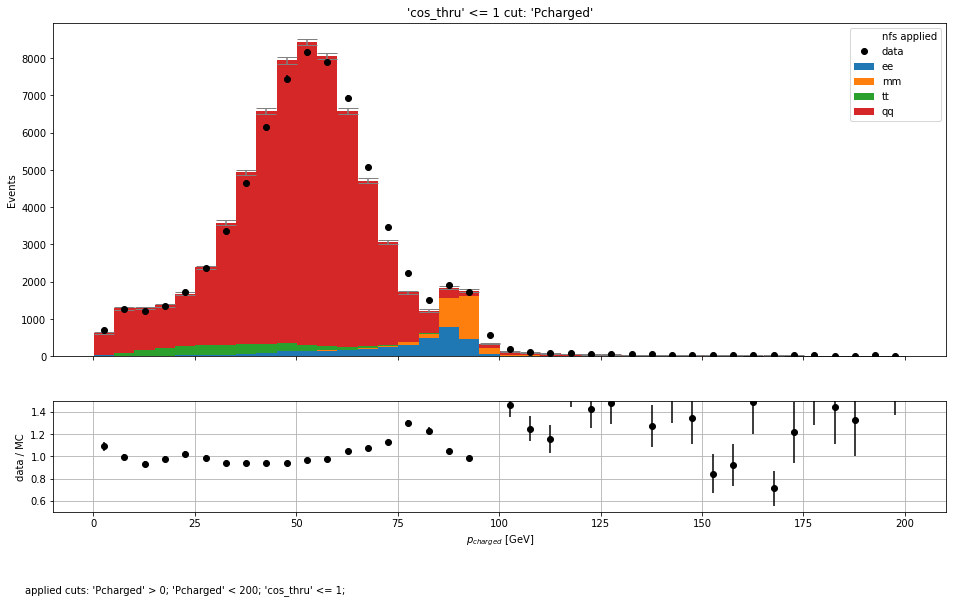

[['Ncharged', '=', 2], ['E_ecal', '>=', 80], ['Pcharged', '<', 200], ['Pcharged', '>', 0], ['cos_thru', '<=', 1], ['cos_thet', '<=', 1, 'ee SR']]


0.0 18.009998


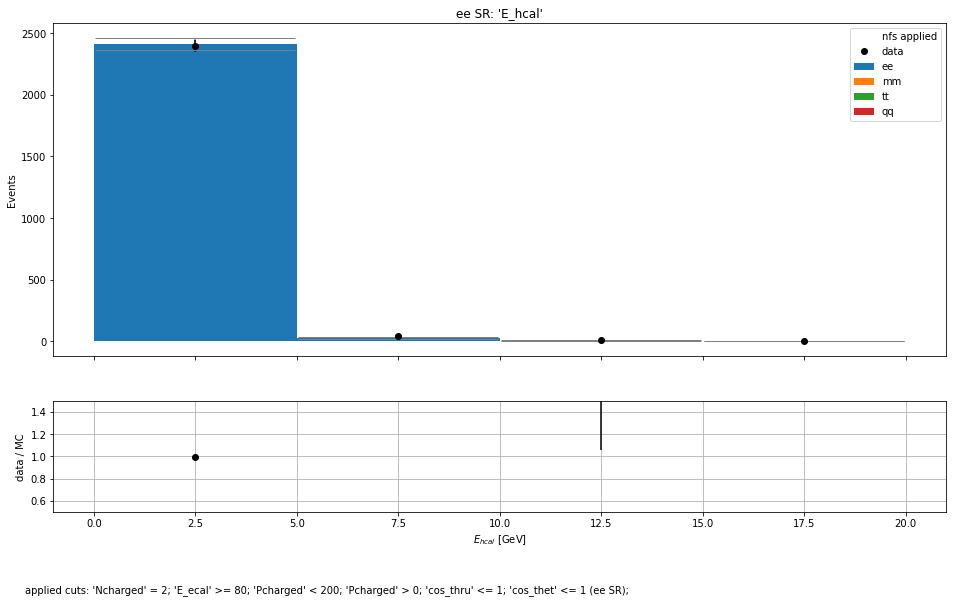

In [9]:
nf_s = []
nf_s_err = []

def plot_hist(mc_data, binning, data=None, title="", xlabel="", ylabel='Events', cut_text="",
              log=False, nf_applied=True,
              fnc=None):
     
    minval = min([min(data_row) if len(data_row) > 0  else 0 for data_row in mc_data])
    maxval = max([max(data_row) if len(data_row) > 0  else 0 for data_row in mc_data])
    
    print(minval, maxval)
    
    if binning == "int":
        binning = 1#range(0, int(maxval)+1)
        
    if data is not None:
        fig, axs = plt.subplots(2,1,figsize=(16,9), sharex=True, gridspec_kw={'height_ratios': [3, 1]})    
    else:
#         fig, axs = plt.subplots(1,1,figsize=(16,9))    
        axs = [plt]

    if nf_applied:
        axs[0].plot([], [], 'none', zorder=-10, label="nfs applied")
    
    label=["ee", "mm", "tt", "qq"]
    mc_bin_content_list = []
    for i,mc_data_channel in enumerate(mc_data):
        mc_bin_content, mc_bin_edges = np.histogram(
            mc_data_channel, bins=np.arange(minval, maxval+binning, binning)) 
        if nf_applied:
            mc_bin_content = mc_bin_content * nf_s[i]
        if len(mc_bin_content_list) > 0:
            mc_bin_content += mc_bin_content_list[-1]
        mc_bin_content_list.append(mc_bin_content)
    
        mc_x = 0.5*(mc_bin_edges[1:] + mc_bin_edges[:-1])
    for i in range(4):  
        axs[0].bar(mc_x, mc_bin_content_list[i], binning,
            label=label[i], zorder=-i)
    
    mc_bin_content = mc_bin_content_list[-1]
    mc_error_sizes = np.sqrt(mc_bin_content)
        
    axs[0].errorbar(mc_x, mc_bin_content, yerr=mc_error_sizes, 
                 fmt='none', ecolor="grey", capsize=400/len(mc_x))
    
    
    if data is not None:
        data_bin_content, data_bin_edges = np.histogram(
            data, bins=np.arange(minval, maxval+binning, binning))

        data_x = 0.5*(data_bin_edges[1:] + data_bin_edges[:-1])

        data_bin_content = data_bin_content
        data_error_sizes = np.sqrt(data_bin_content)
        
        axs[0].plot(data_x, data_bin_content, 'ko', label="data")
        axs[0].errorbar(data_x, data_bin_content, yerr=data_error_sizes, 
                     fmt='none', ecolor="k")
        
        axs[1].plot(data_x, data_bin_content/mc_bin_content, 
                    'ko', label="data")
        axs[1].errorbar(data_x, data_bin_content/mc_bin_content, 
                        yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")
        axs[1].set_ylim([0.5,1.5])
        axs[1].set_ylabel("data / MC")
        axs[1].grid()
        
    if fnc:
        fnc(axs[0], data_x, data_bin_content, data_error_sizes)

    axs[0].legend()
    if log:
        axs[0].yscale('log')
    axs[0].set_title(title)
    axs[0].set_ylabel(ylabel)
    axs[-1].set_xlabel(xlabel)
    fig.text(0.1, 0, cut_text)
        
    plt.savefig("plots/{}.png".format(title))
    plt.show()

def load_variable(variable, branches):
    data_row = None
    if variable == "E_ecal+hcal":
        data_row = ak.to_numpy(branches["E_ecal"]) +  ak.to_numpy(branches["E_hcal"])
    else:
        data_row = ak.to_numpy(branches[variable])

    label = "?"
    if variable == "Ncharged": label = r"$n_{tracks}$"
    elif variable == "Pcharged": label = r"$p_{charged}$ [GeV]"
    elif variable == "E_ecal": label = r"$E_{ecal}$ [GeV]"
    elif variable == "E_hcal": label = r"$E_{hcal}$ [GeV]"
    elif variable == "E_lep": label = r"$\sqrt{s} / 2$ [GeV]"
    elif variable == "cos_thru": label = r"$cos(\theta_{thrust}$)"
    elif variable == "cos_thet": label = r"$cos(\theta)$"

    return data_row, label

def calculate_cuts(cuts, files):
    final_cut_mask = [[]]*len(files)

    for i,file in enumerate(files):

        branches = file[ttree_name].arrays()

        cut_masks = []

        for cut in cuts:
            cut_var = cut[0]
            cut_logic = cut[1]
            cut_val = cut[2]

            data_row,_ = load_variable(cut_var, branches)

            cut_mask = []
            if cut_logic == ">":
                cut_mask = np.array(data_row > cut_val)
            elif cut_logic == ">=":
                cut_mask = np.array(data_row >= cut_val)
            elif cut_logic == "=":
                cut_mask = np.array(data_row == cut_val)
            elif cut_logic == "<=":
                cut_mask = np.array(data_row <= cut_val)
            elif cut_logic == "<":
                cut_mask = np.array(data_row < cut_val)
            elif cut_logic == "><":
                cut_mask = np.array(data_row < cut_val[0]) | np.array(data_row > cut_val[1])

            cut_masks.append(cut_mask)

        final_cut_mask[i] = [True] * len(branches)


        for cut_mask in cut_masks:
            final_cut_mask[i] = final_cut_mask[i] & cut_mask

    return final_cut_mask

def create_curflow(cuts, files):
    
    temp_cuts = []
    for cut in cuts:
        temp_cuts.append(cut)
        
        cut_mask = calculate_cuts(temp_cuts, files)
        eff_list = []
        for i in range(4):
            eff = sum(cut_mask[i]) / len(cut_mask[i])
            eff_list.append(eff)
        print(cut, eff_list)
        
def plot_cut_hists(cuts, binning):
    
    temp_cuts = []
    for i,cut in enumerate(cuts):
        
        if i < len(binning) and binning[i]:
            print("before", cut)
            plot_hist_with_cuts(temp_cuts, [[cut[0], binning[i]]], log=False)
        
        temp_cuts.append(cut)
        


def plot_hist_with_cuts(cuts, hists, log=False, nf_applied=True, plot_data=True, title_mod="", fnc=None):

    print(cuts)

    mc_cut_mask = calculate_cuts(cuts, files)

    data_cut_mask = calculate_cuts(energy_cut_params[3] + cuts, [data_file])

        
    for hist in hists:
        variable, binning = hist
        
        branches = data_file[ttree_name].arrays()
        data_row, _ = load_variable(variable, branches)
        data_row = data_row[data_cut_mask[0]]
        
        mc_data = []

        for i,file in enumerate(files):

            
            
            branches = file[ttree_name].arrays()
            mc_data_row, label = load_variable(variable, branches)
            mc_data_row = mc_data_row[mc_cut_mask[i]]

            mc_data.append(mc_data_row)

        title = ""
        if len(cuts)>0:
            final_cut = cuts[-1]
            if len(final_cut) >= 4:
                title="{}: '{}'".format(final_cut[3],variable)
            else:
                title="'{}' {} {} cut: '{}'".format(*final_cut,variable)
        else:
                title="without cuts: '{}'".format(variable)    
        
        cut_text = "applied cuts: "
        for cut in cuts:
            if len(cut) >= 4:
                cut_text +="'{}' {} {} ({}); ".format(*cut)
            else:
                cut_text +="'{}' {} {}; ".format(*cut)

                
        plot_hist(mc_data, binning, data=data_row if plot_data else None, 
                  title=title+title_mod, xlabel=label, cut_text=cut_text,
                  log=log, nf_applied=nf_applied, fnc=fnc)

for j,sr_cuts in enumerate([ee_cut_params, mm_cut_params, tt_cut_params, qq_cut_params]):

    mc_cut_mask = calculate_cuts(sr_cuts, files)
    data_cut_mask = calculate_cuts(energy_cut_params[3] + sr_cuts, [data_file])
    
    mc_events = sum(sum(c) for c in mc_cut_mask)
    data_events = sum(sum(c) for c in data_cut_mask)
    nf = data_events / mc_events
    nf_err = np.sqrt((np.sqrt(data_events)/mc_events)**2 +\
                     (np.sqrt(mc_events)*data_events/mc_events**2)**2)
    print("nf{}: {} +- {}".format(j,nf,nf_err))
    nf_s.append(nf)
    nf_s_err.append(nf_err)

# plot_hist_with_cuts(ee_cut_params,[["cos_thet", .01]])
plot_hist_with_cuts([['Pcharged', ">", 0],   
                     ['Pcharged', "<", 200], 
                     ['cos_thru', "<=", 1]],[["Pcharged", 5]])
plot_hist_with_cuts(ee_cut_params,[["E_hcal", 5]])

E_lep 93802 [91.278 91.278 91.278 ... 91.278 91.278 91.278]
E_lep 94381 [91.248 91.248 91.248 ... 91.248 91.248 91.248]
E_lep 79214 [91.278 91.278 91.278 ... 91.278 91.278 91.278]
E_lep 98563 [91.25  91.25  91.25  ... 91.248 91.248 91.248]
[['Pcharged', '>', 0], ['Pcharged', '<', 200], ['cos_thru', '<=', 1]]


0.0 48.0


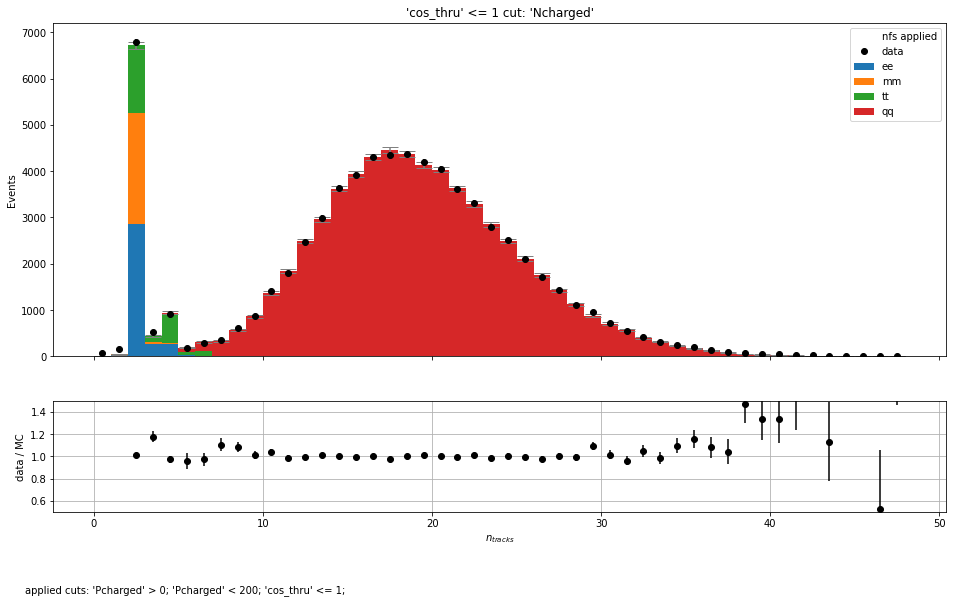

0.15678218 199.99657


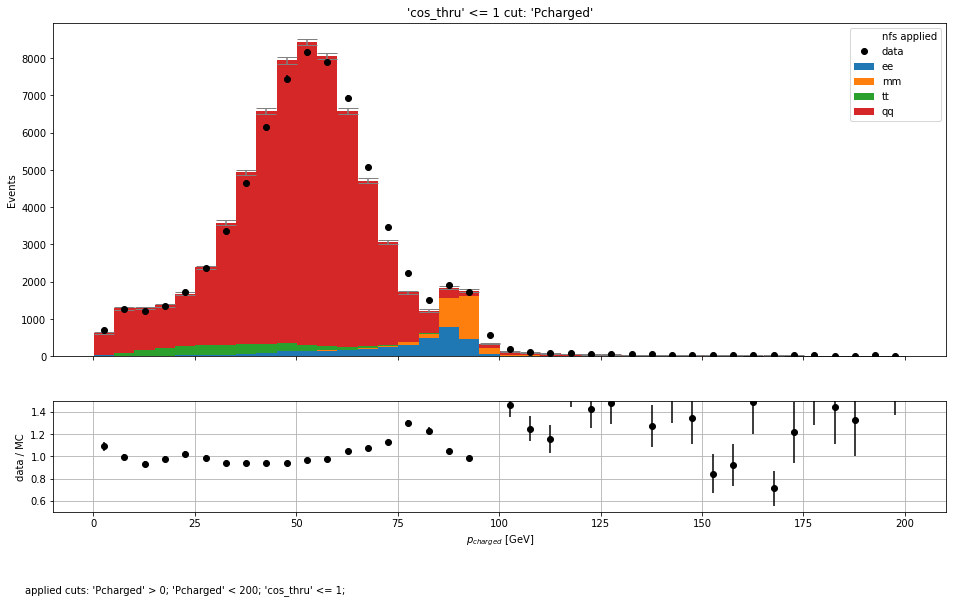

1.1170769 144.84598


<ipython-input-9-12fdd7790d53>:61: RuntimeWarning: divide by zero encountered in true_divide
  axs[1].plot(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:63: RuntimeWarning: divide by zero encountered in true_divide
  axs[1].errorbar(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:64: RuntimeWarning: divide by zero encountered in true_divide
  yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")
/projects/65341ef6-5538-4446-9178-dcfd0df75e06/.sage/local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3457: RuntimeWarning: invalid value encountered in double_scalars
  low = [v if lo else v - e for v, e, lo in zip(data, a, lolims)]


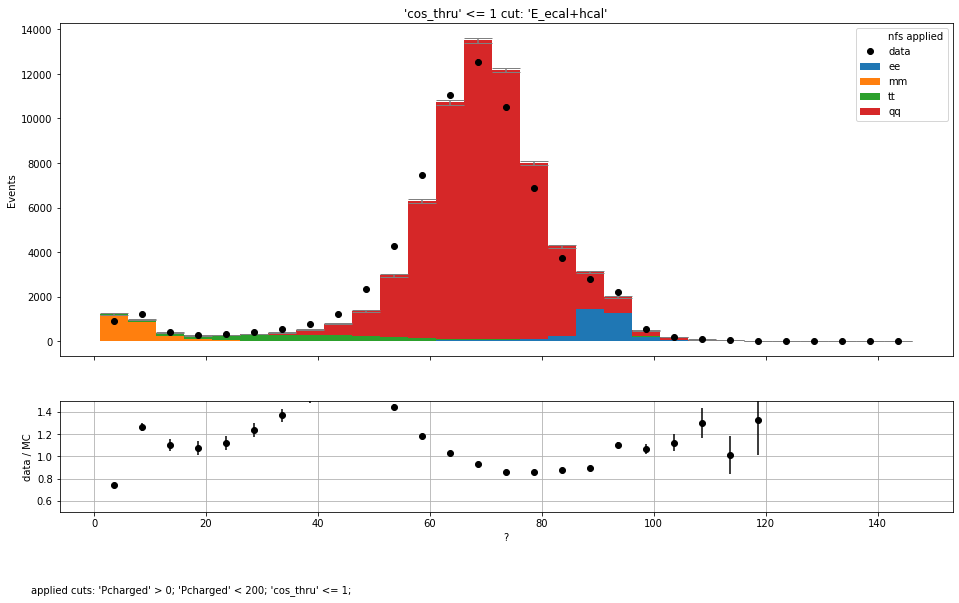

0.20199999 117.24068


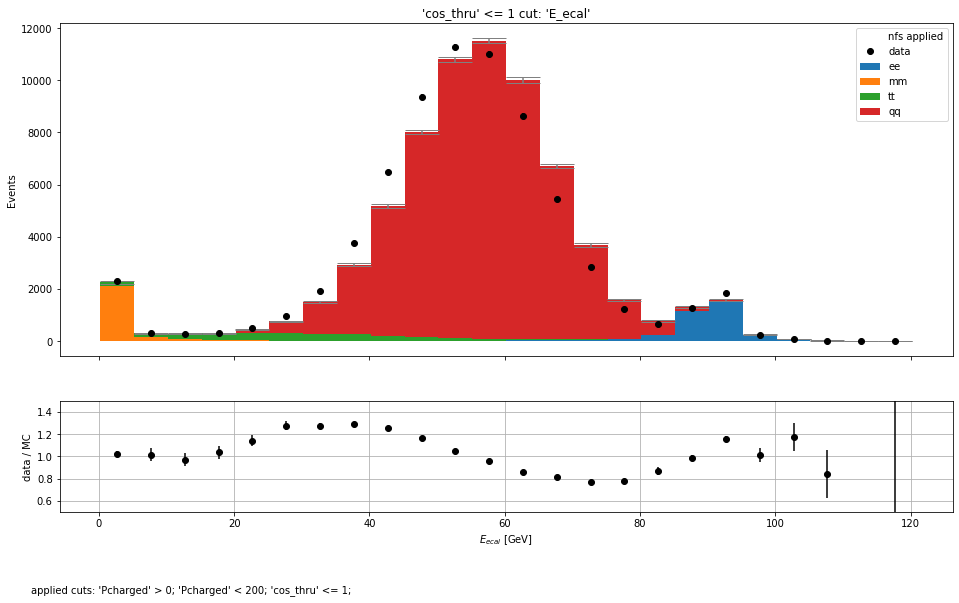

0.0 102.08


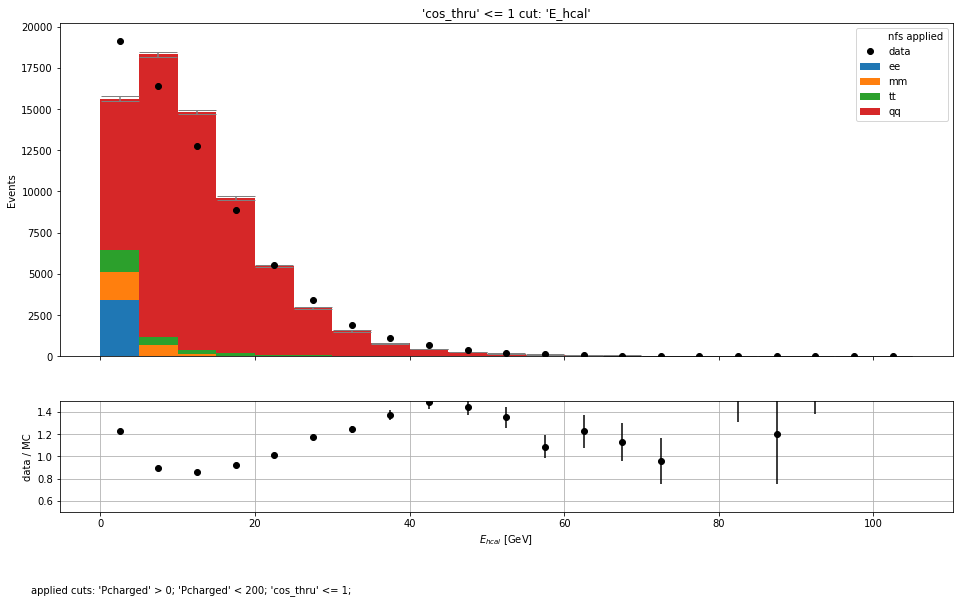

-0.9999853 0.9999364


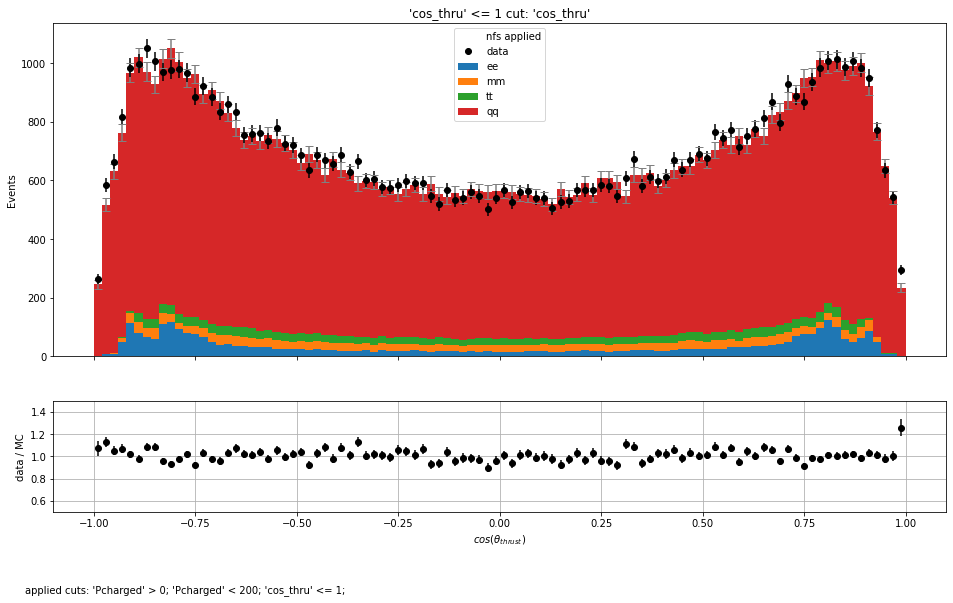

[['Pcharged', '>', 0], ['Pcharged', '<', 200], ['cos_thru', '<=', 1], ['cos_thet', '<=', 1]]


-0.97871214 0.99349636


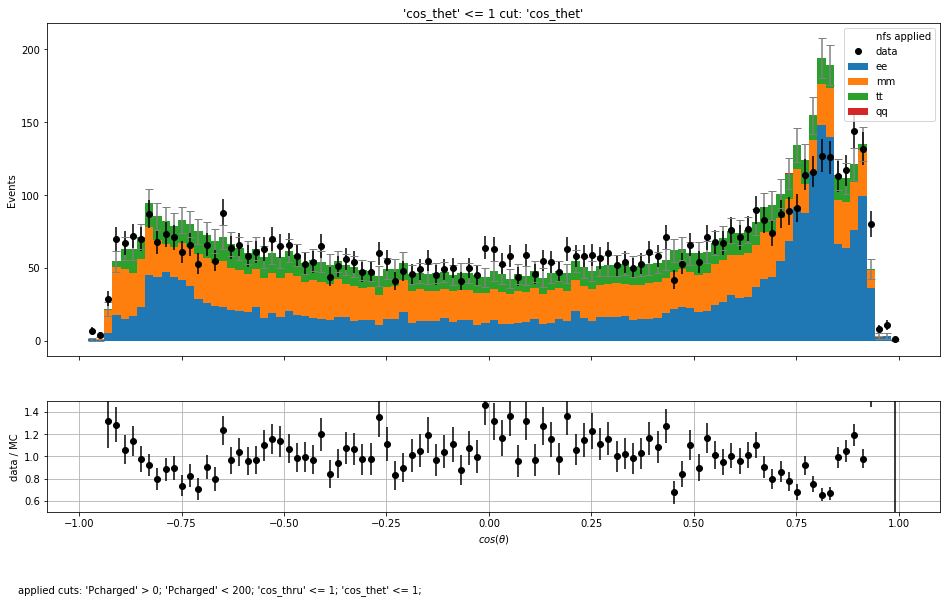

In [10]:
## Define an numpy array for 'Pcharged'
var = 'E_lep'
data = []
for file in files:
    branches = file[ttree_name].arrays()

    data_row = ak.to_numpy(branches[var]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
    data.append(data_row)
    print(var, len(data_row), data_row*2)

# plt.hist(data, stacked=True, bins=range(0,int(max(data[3]))+1),
#          label=["ee", "mm", "tt", "qq"])
# plt.legend()
# # plt.yscale('log')
# plt.show()

plot_hist_with_cuts([
        ['Pcharged', ">", 0],         
        ['Pcharged', "<", 200],     
        ['cos_thru', "<=", 1],
#         ['cos_thet', "<=", 1],
    ], [["Ncharged", "int"], ["Pcharged", 5],["E_ecal+hcal", 5],["E_ecal", 5],["E_hcal", 5], ["cos_thru", .02]])

plot_hist_with_cuts([
        ['Pcharged', ">", 0],         
        ['Pcharged', "<", 200],     
        ['cos_thru', "<=", 1],
        ['cos_thet', "<=", 1],
    ], [["cos_thet", .02]])

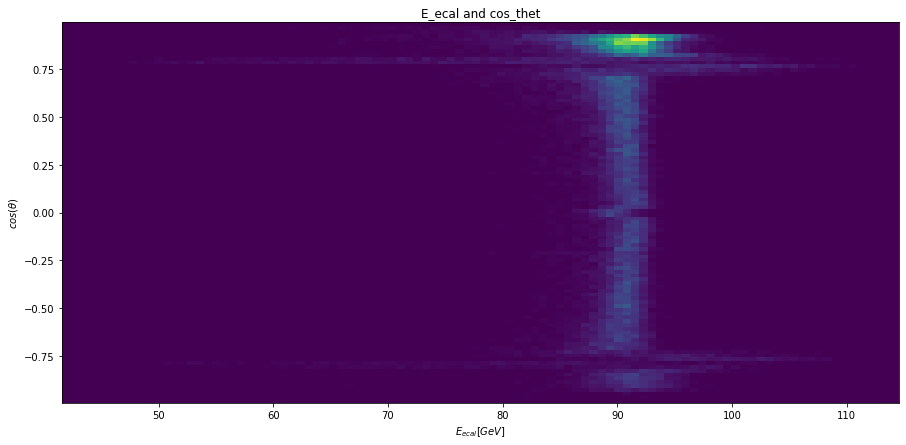

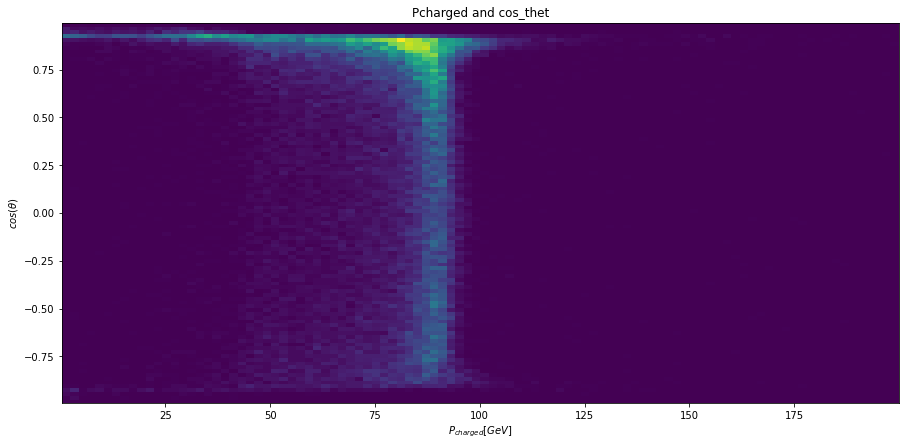

In [11]:
category = 0

branches =  files[category][ttree_name].arrays()

cut_mask = calculate_cuts([
        ["Pcharged", ">", 0],
        ["Pcharged", "<=", 200],
        ["cos_thet", "<=", 1]
    ], [files[category]])

#print(cut_mask)

datax = ak.to_numpy(branches["E_ecal"])[cut_mask[0]]
datay = ak.to_numpy(branches["cos_thet"])[cut_mask[0]]

plt.hist2d(datax, datay, bins=100, range=None, density=False, weights=None, cmin=None, cmax=None,  data=None)
title = "E_ecal and cos_thet"
plt.title(title)
plt.xlabel(r"$E_{ecal} [GeV]$")
plt.ylabel(r"$cos(\theta)$")

plt.savefig("plots/{}.png".format(title))
plt.show()

datax = ak.to_numpy(branches["Pcharged"])[cut_mask[0]]
datay = ak.to_numpy(branches["cos_thet"])[cut_mask[0]]

plt.hist2d(datax, datay, bins=100, range=None, density=False, weights=None, cmin=None, cmax=None,  data=None)
title = "Pcharged and cos_thet"
plt.title(title)
plt.xlabel(r"$P_{charged} [GeV]$")
plt.ylabel(r"$cos(\theta)$")

plt.savefig("plots/{}.png".format(title))
plt.show()

ee with n_track = 0
[['cos_thru', '<=', 1], ['cos_thet', '<=', 1], ['Ncharged', '=', 0]]


-0.9975148 0.99743485


<ipython-input-9-12fdd7790d53>:61: RuntimeWarning: divide by zero encountered in true_divide
  axs[1].plot(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:61: RuntimeWarning: invalid value encountered in true_divide
  axs[1].plot(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:63: RuntimeWarning: divide by zero encountered in true_divide
  axs[1].errorbar(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:63: RuntimeWarning: invalid value encountered in true_divide
  axs[1].errorbar(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:64: RuntimeWarning: divide by zero encountered in true_divide
  yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")
<ipython-input-9-12fdd7790d53>:64: RuntimeWarning: invalid value encountered in true_divide
  yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")
/projects/65341ef6-5538-4446-9178-dcfd0df75e06/.sage/local/lib/python3.8/site-packages/ma

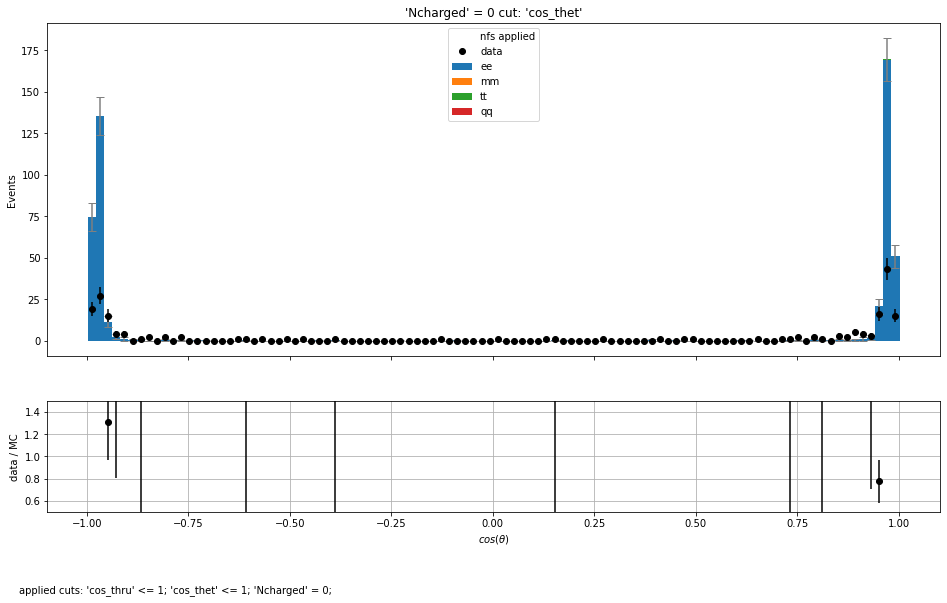

ee
before ['Ncharged', '=', 2]
[]


0.0 48.0


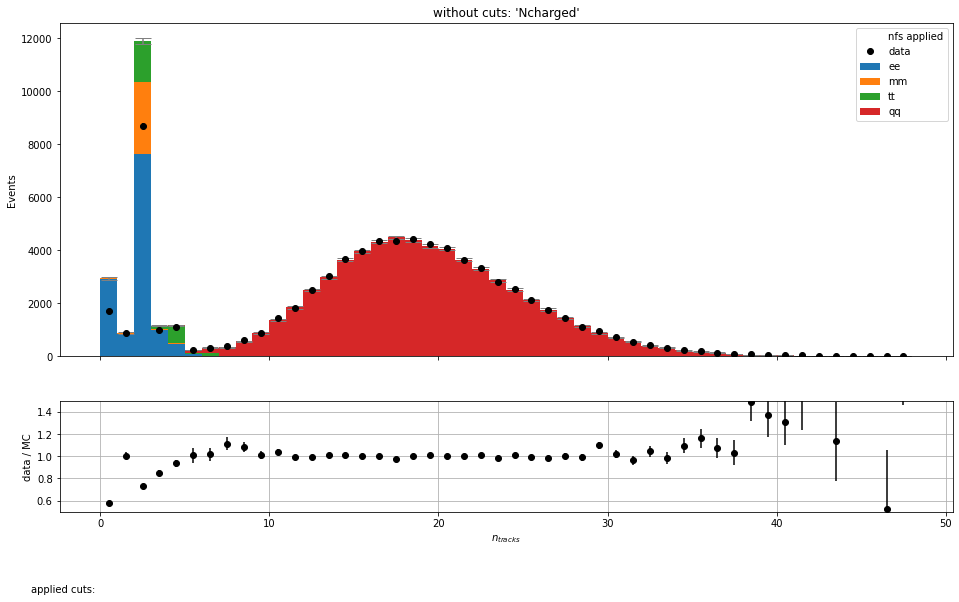

before ['E_ecal', '>=', 80]
[['Ncharged', '=', 2]]


0 123.75439


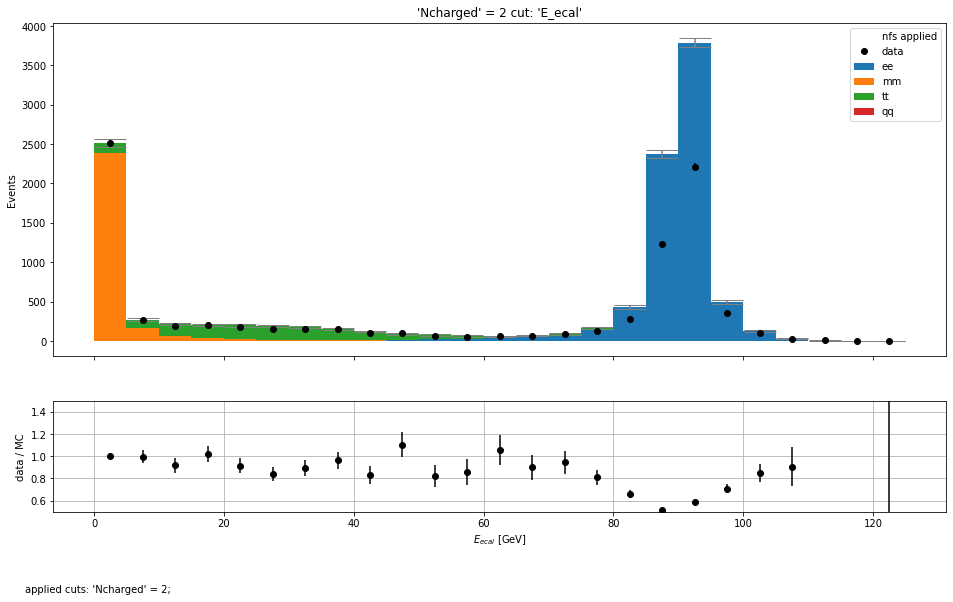

[['Ncharged', '=', 2], ['E_ecal', '>=', 80], ['Pcharged', '<', 200], ['Pcharged', '>', 0], ['cos_thru', '<=', 1], ['cos_thet', '<=', 1, 'ee SR']]


0 188.69284


<ipython-input-9-12fdd7790d53>:61: RuntimeWarning: invalid value encountered in true_divide
  axs[1].plot(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:63: RuntimeWarning: invalid value encountered in true_divide
  axs[1].errorbar(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:64: RuntimeWarning: invalid value encountered in true_divide
  yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")


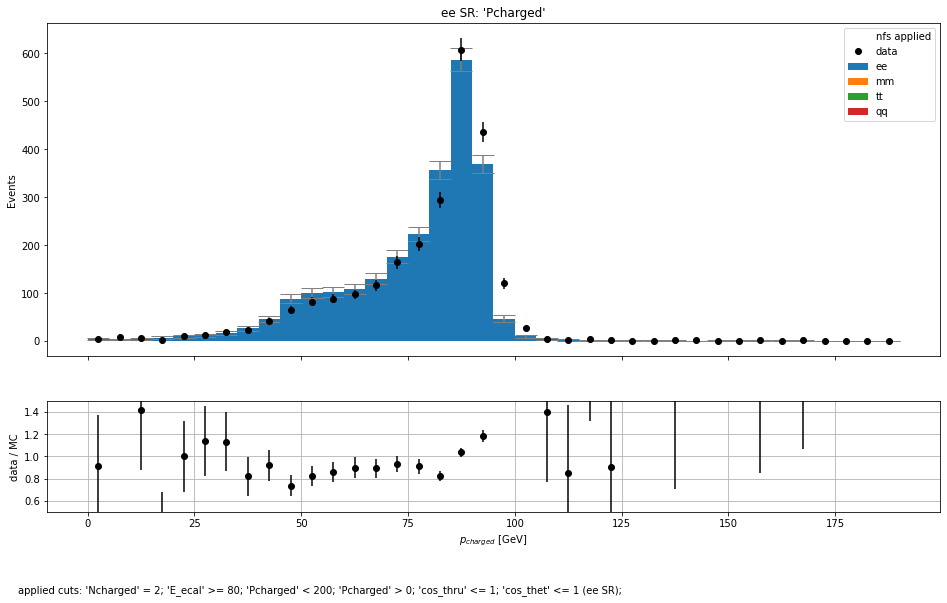

0 113.35983


<ipython-input-9-12fdd7790d53>:61: RuntimeWarning: invalid value encountered in true_divide
  axs[1].plot(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:63: RuntimeWarning: invalid value encountered in true_divide
  axs[1].errorbar(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:64: RuntimeWarning: invalid value encountered in true_divide
  yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")


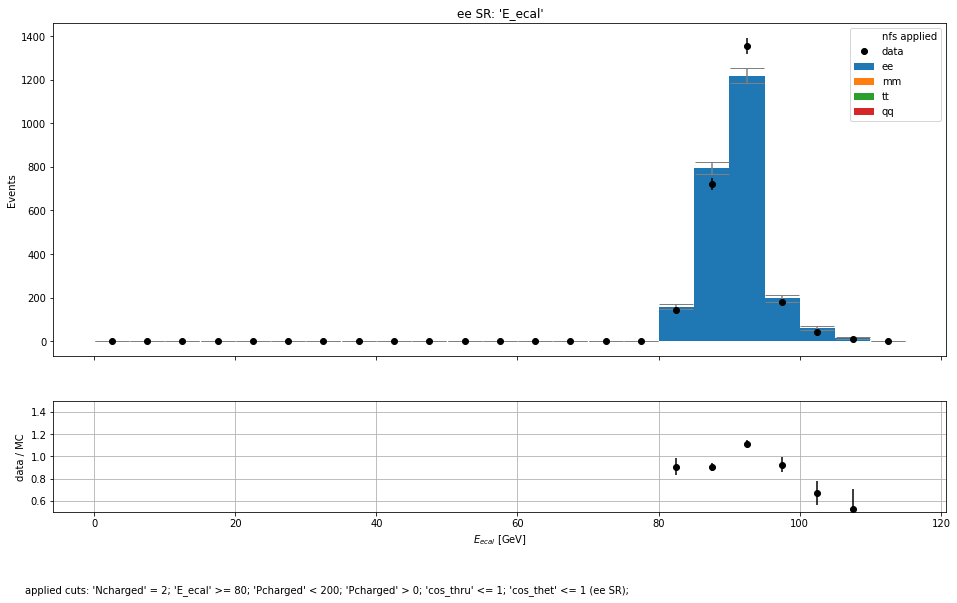

0.0 18.009998


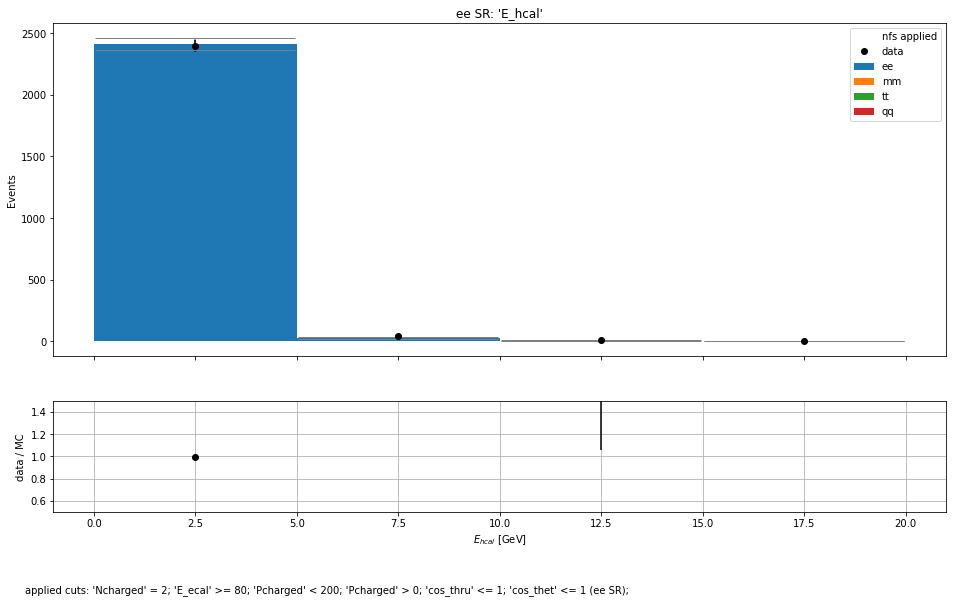

-0.9667646 0.9733311


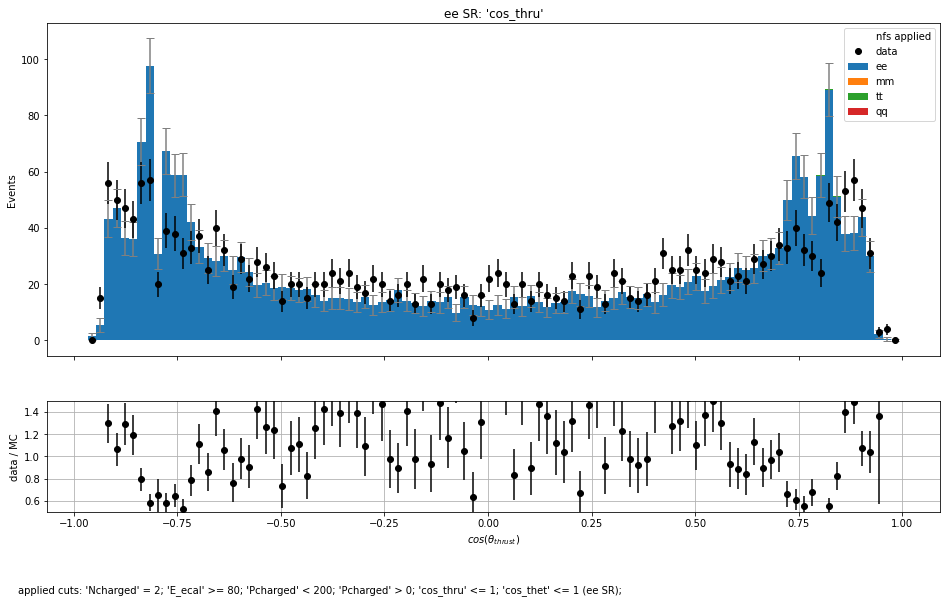

-0.96378934 0.9932407


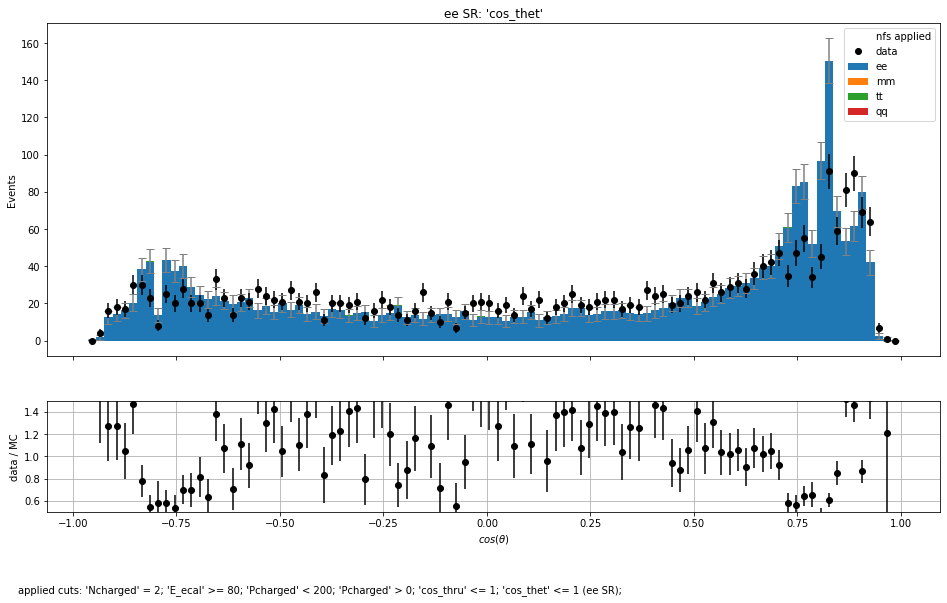

In [12]:
print("ee with n_track = 0")
plot_hist_with_cuts([
         
         #['E_ecal', ">=" , 80],

         #['Pcharged', ">", 0],
         #['Pcharged', "<", 200],
         ['cos_thru', "<=", 1],
         ['cos_thet', "<=", 1],
         ['Ncharged', "=" , 0],
        ], [["cos_thet", .02]])

print("ee")
plot_cut_hists(ee_cut_params, ["int", 5])

plot_hist_with_cuts(ee_cut_params, [["Pcharged",5],["E_ecal", 5],["E_hcal", 5], ["cos_thru", .02], ["cos_thet", .02]])

mm
before ['Ncharged', '=', 2]
[]


0.0 48.0


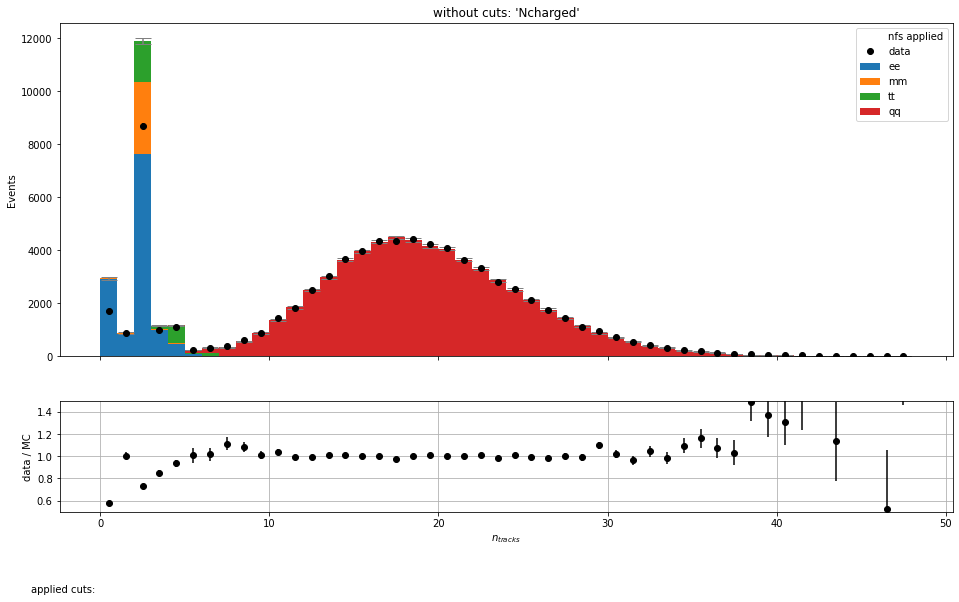

before ['E_ecal', '<=', 40]
[['Ncharged', '=', 2]]


0 123.75439


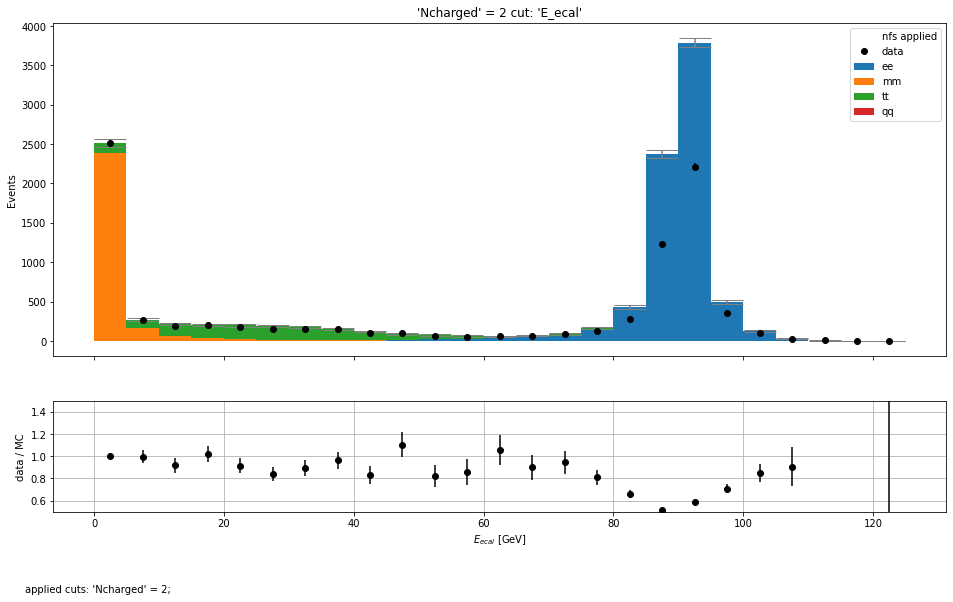

before ['Pcharged', '>', 72]
[['Ncharged', '=', 2], ['E_ecal', '<=', 40], ['Pcharged', '<', 200]]


0 199.70483


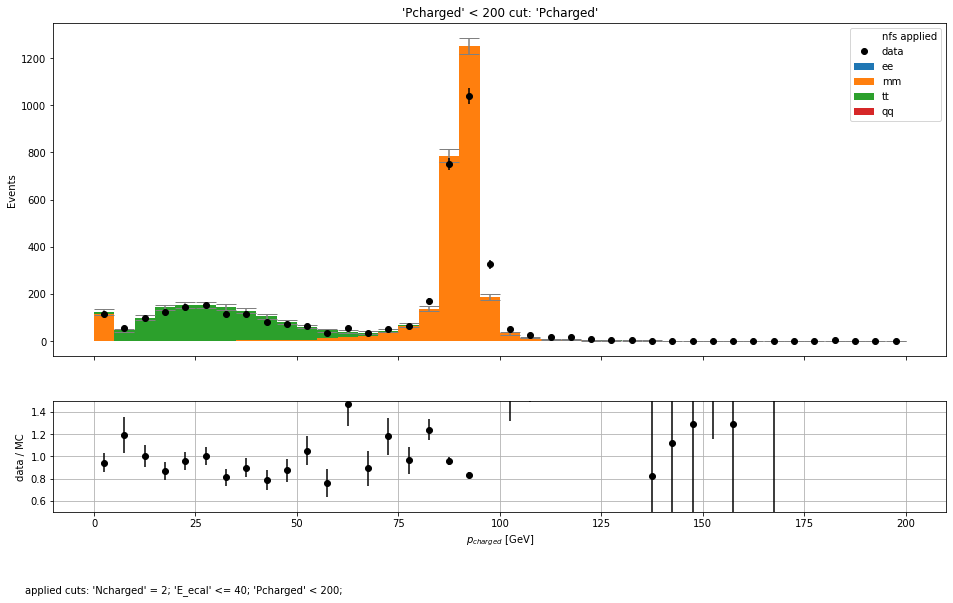

[['Ncharged', '=', 2], ['E_ecal', '<=', 40], ['Pcharged', '<', 200], ['Pcharged', '>', 72], ['cos_thru', '<=', 1], ['cos_thet', '<=', 1, 'mm SR']]


0 199.70483


<ipython-input-9-12fdd7790d53>:61: RuntimeWarning: invalid value encountered in true_divide
  axs[1].plot(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:63: RuntimeWarning: invalid value encountered in true_divide
  axs[1].errorbar(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:64: RuntimeWarning: invalid value encountered in true_divide
  yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")


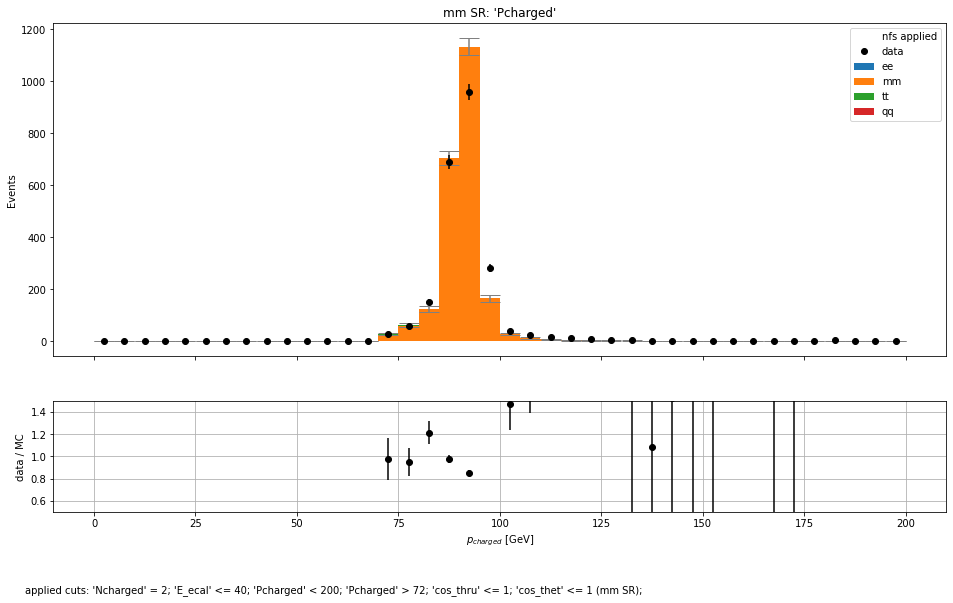

0 39.893154


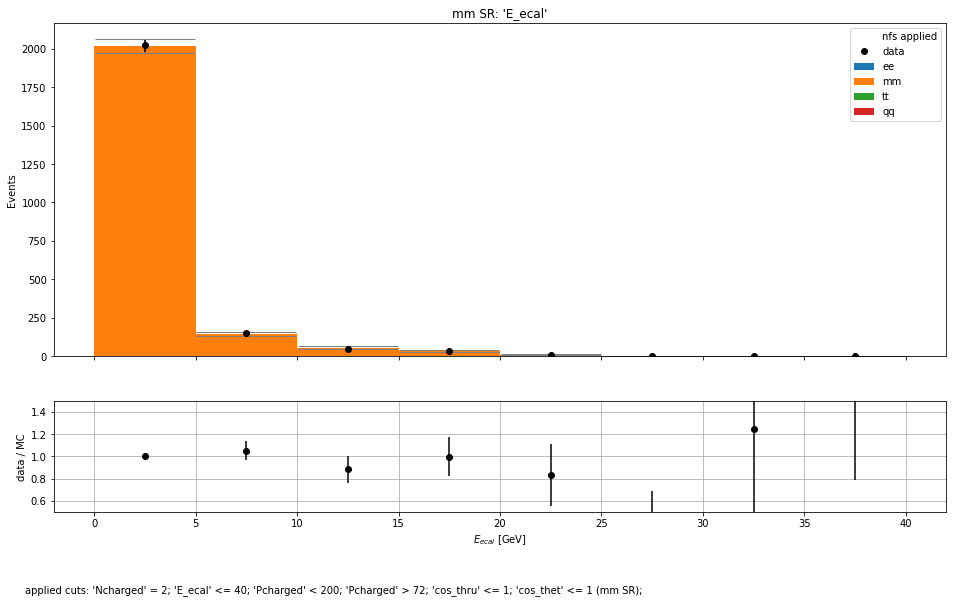

0 87.9318


<ipython-input-9-12fdd7790d53>:61: RuntimeWarning: invalid value encountered in true_divide
  axs[1].plot(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:63: RuntimeWarning: invalid value encountered in true_divide
  axs[1].errorbar(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:64: RuntimeWarning: invalid value encountered in true_divide
  yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")


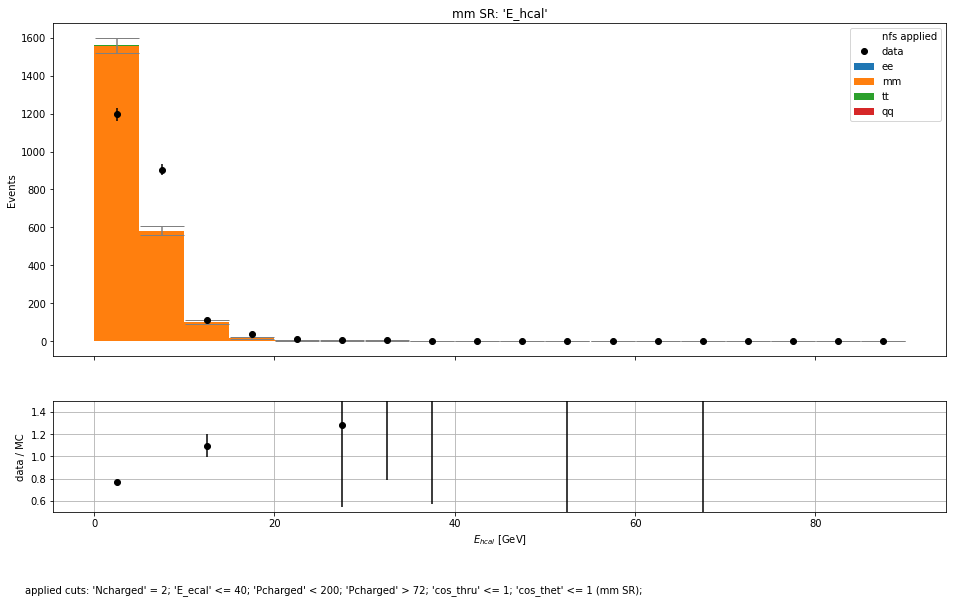

-0.9373468 0.93445754


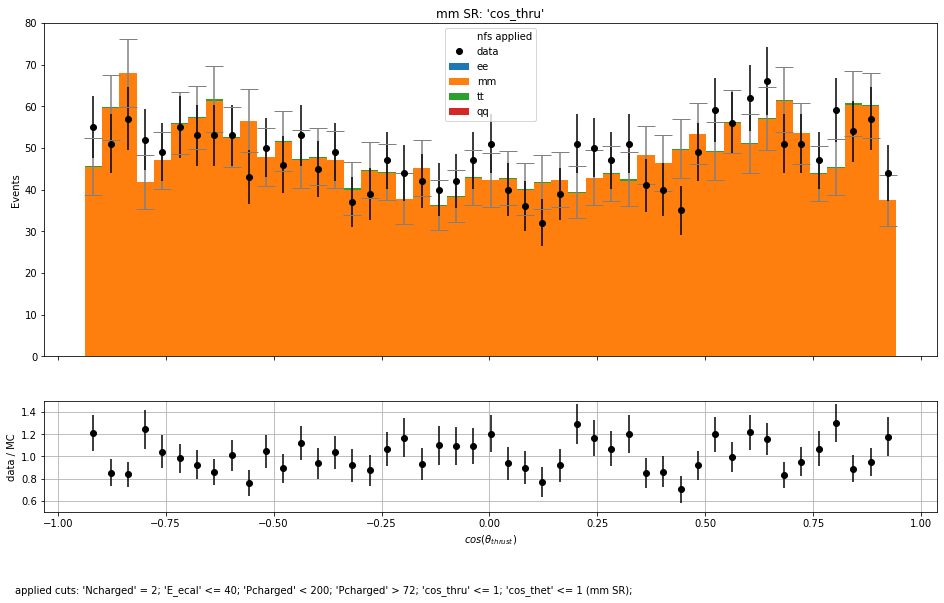

-0.95102376 0.9695726


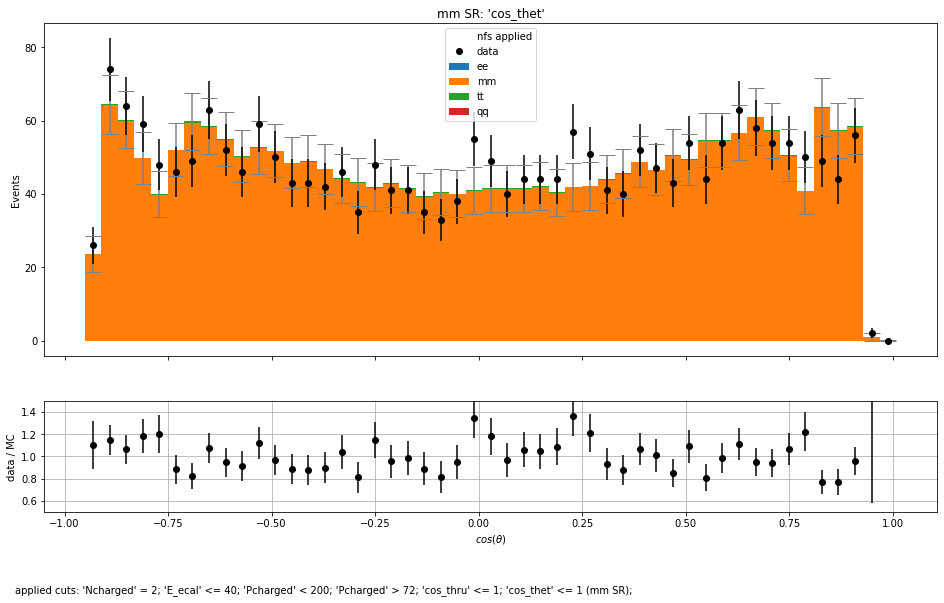

In [13]:
print("mm")
plot_cut_hists(mm_cut_params, ["int", 5, None, 5])

plot_hist_with_cuts(mm_cut_params, [["Pcharged", 5],["E_ecal", 5], ["E_hcal", 5], ["cos_thru", .04], ["cos_thet", .04]])

tt
before ['Ncharged', '>=', 2]
[]


0.0 48.0


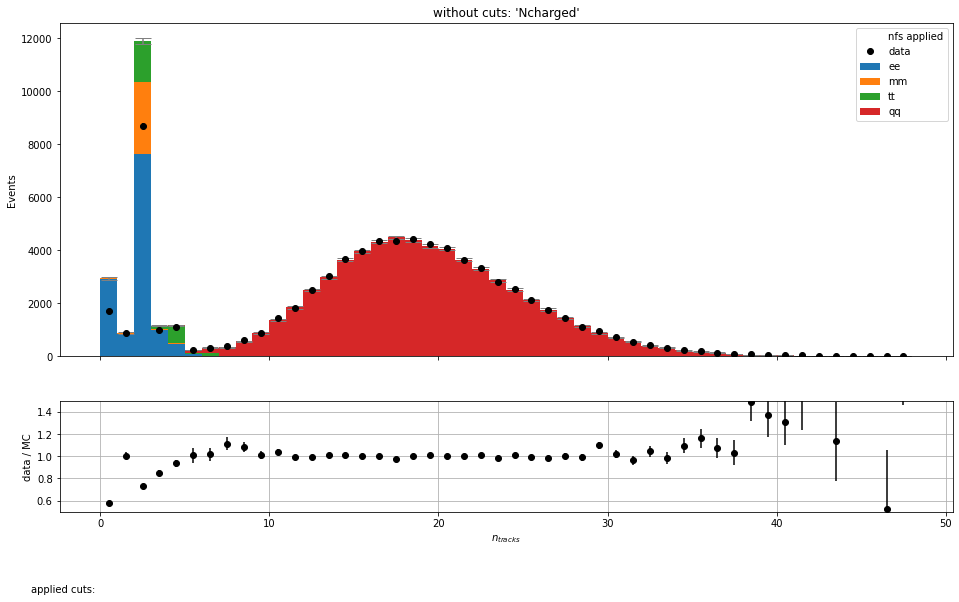

before ['E_ecal', '<=', 70]
[['Ncharged', '>=', 2], ['Ncharged', '<=', 6]]


0.20199999 123.75439


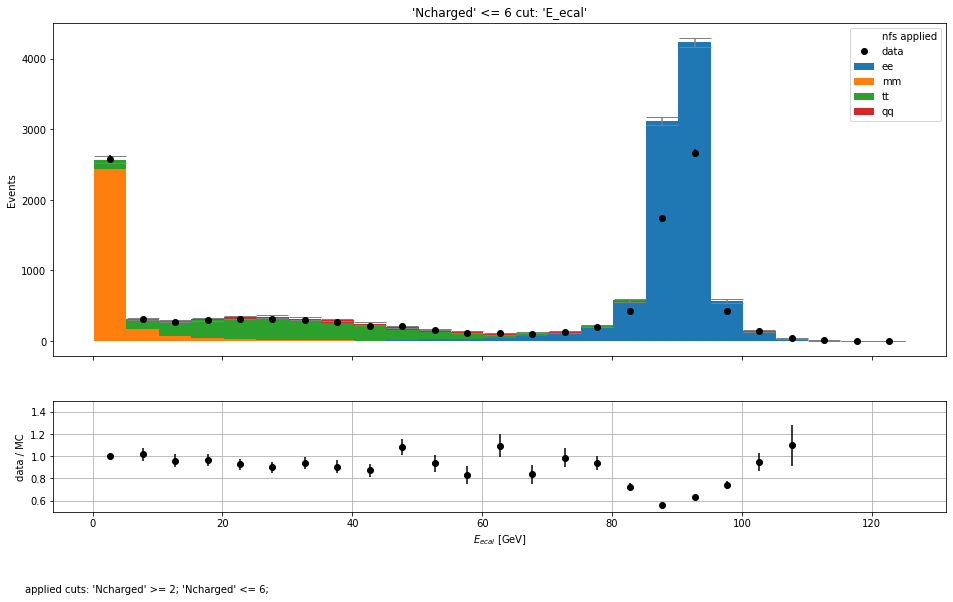

before ['Pcharged', '<', 60]
[['Ncharged', '>=', 2], ['Ncharged', '<=', 6], ['E_ecal', '<=', 70], ['Pcharged', '<', 200]]


0.0 199.70483


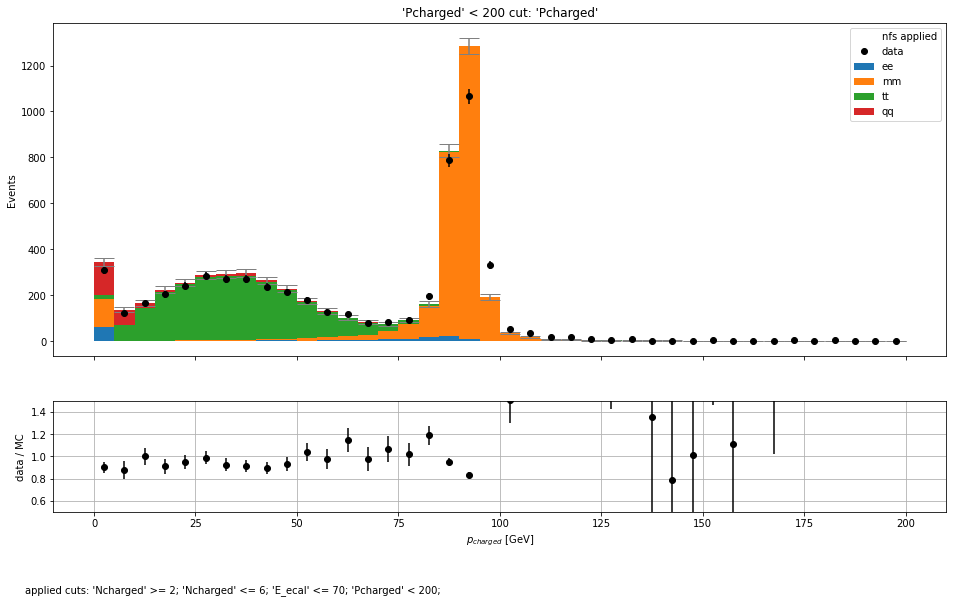

before ['cos_thru', '<', 0.92]
[['Ncharged', '>=', 2], ['Ncharged', '<=', 6], ['E_ecal', '<=', 70], ['Pcharged', '<', 200], ['Pcharged', '<', 60], ['cos_thru', '<=', 1]]


-0.99984854 0.9990134


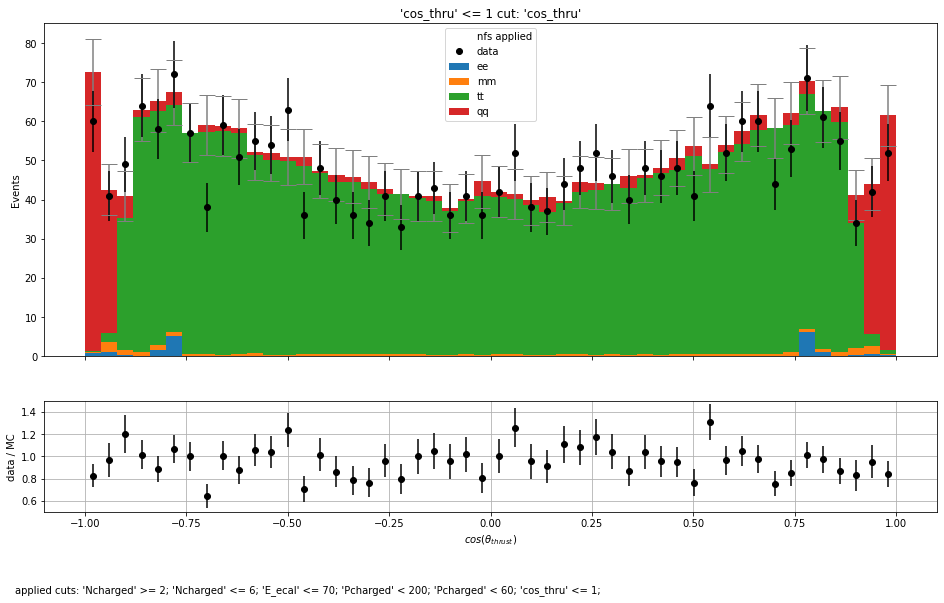

[['Ncharged', '>=', 2], ['Ncharged', '<=', 6], ['E_ecal', '<=', 70], ['Pcharged', '<', 200], ['Pcharged', '<', 60], ['cos_thru', '<=', 1], ['cos_thru', '<', 0.92], ['cos_thru', '>', -0.92], ['Pcharged', '>', 0, 'tt SR']]


0.18614152 59.9991


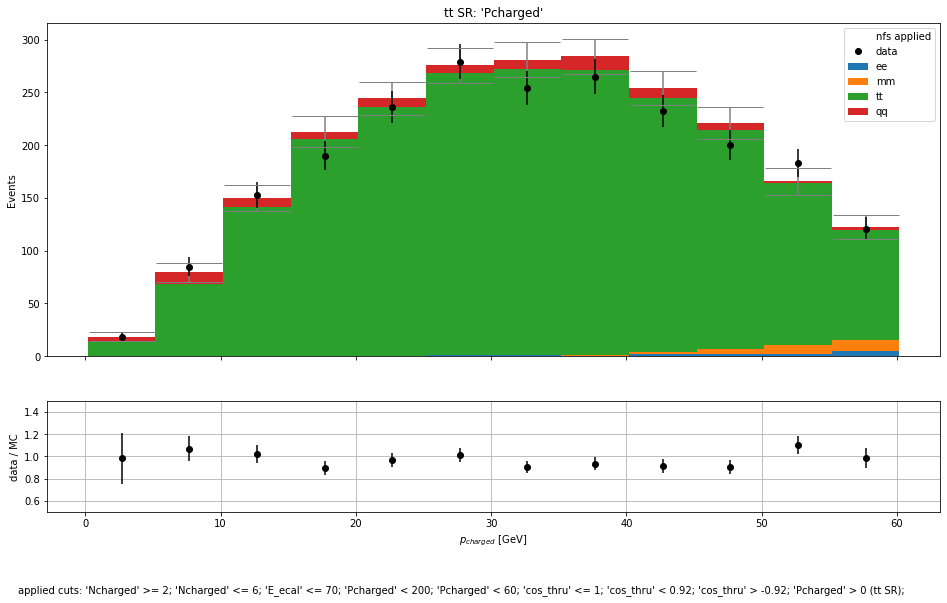

0.6976264 69.99968


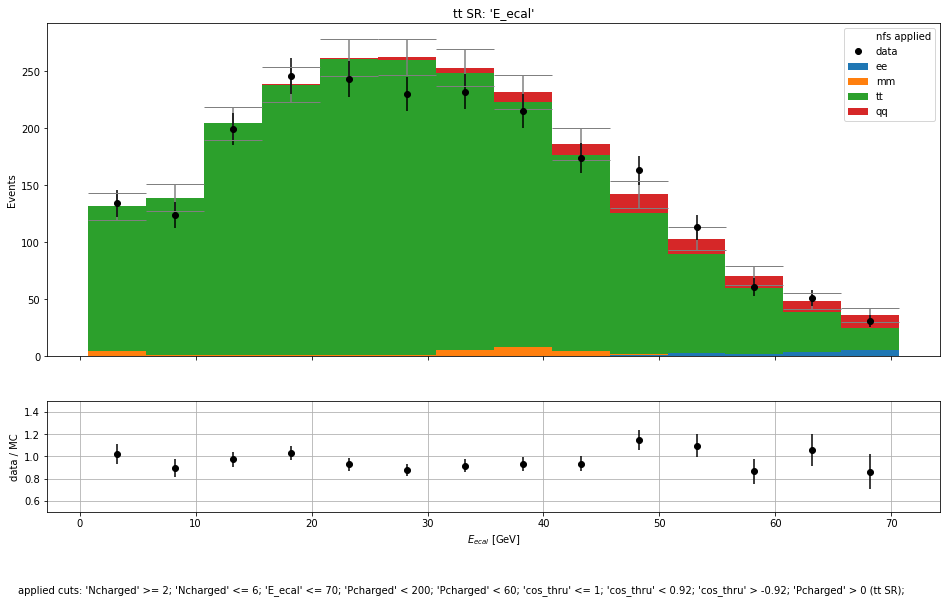

0.0 86.19


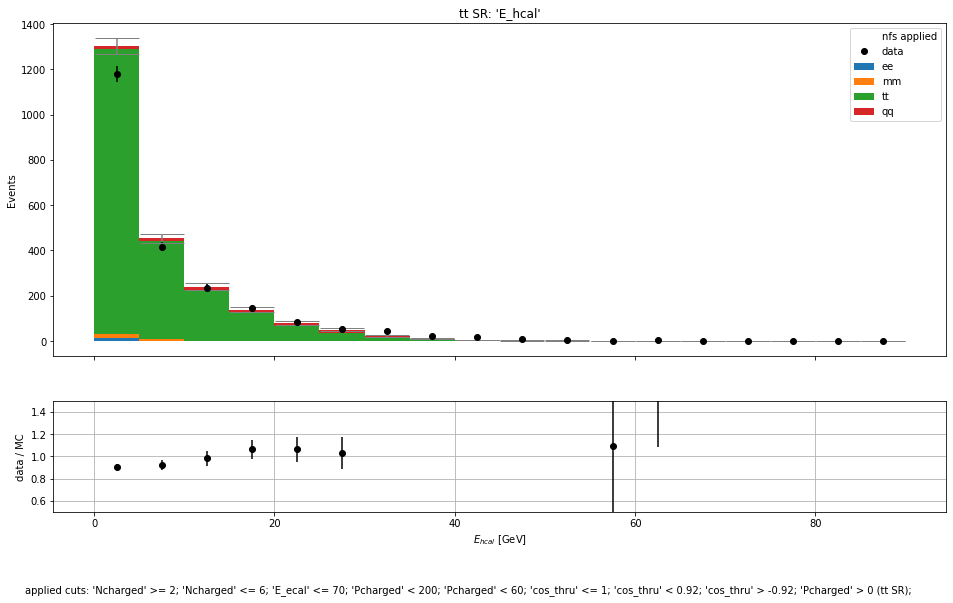

-0.9196445 0.919847


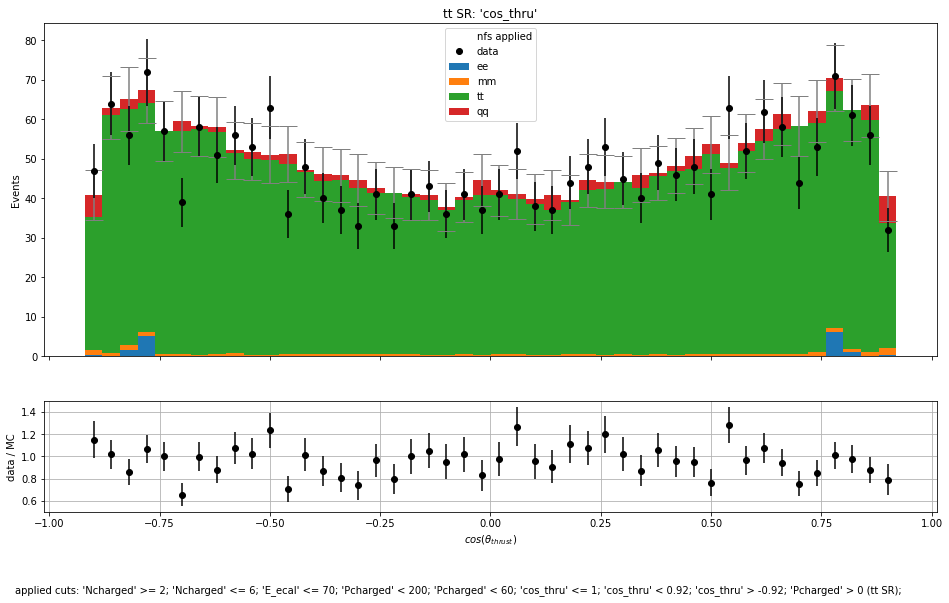

In [14]:
print("tt")
plot_cut_hists(tt_cut_params, ["int", None, 5, None, 5, None, 0.04])

plot_hist_with_cuts(tt_cut_params, 
                    [["Pcharged",5],
                     ["E_ecal", 5],                                     
                     ["E_hcal", 5], 
                     ["cos_thru", .04],                                     
                     #["cos_thet", 100]
                    ])

qq
before ['Ncharged', '>', 8]
[]


0.0 48.0


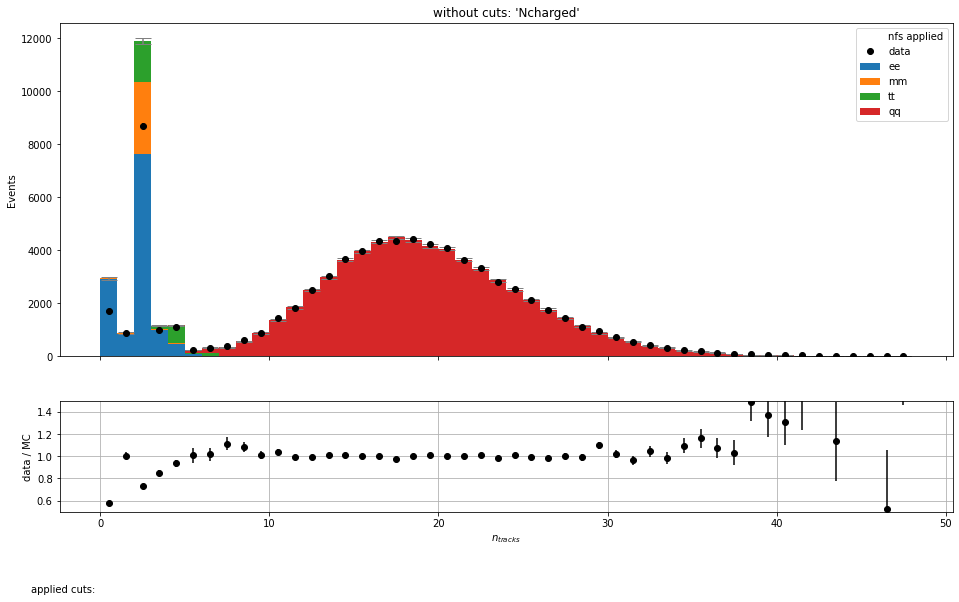

[['Ncharged', '>', 8], ['Pcharged', '<', 200], ['Pcharged', '>', 0], ['cos_thru', '<=', 1, 'qq SR']]


0 199.99657


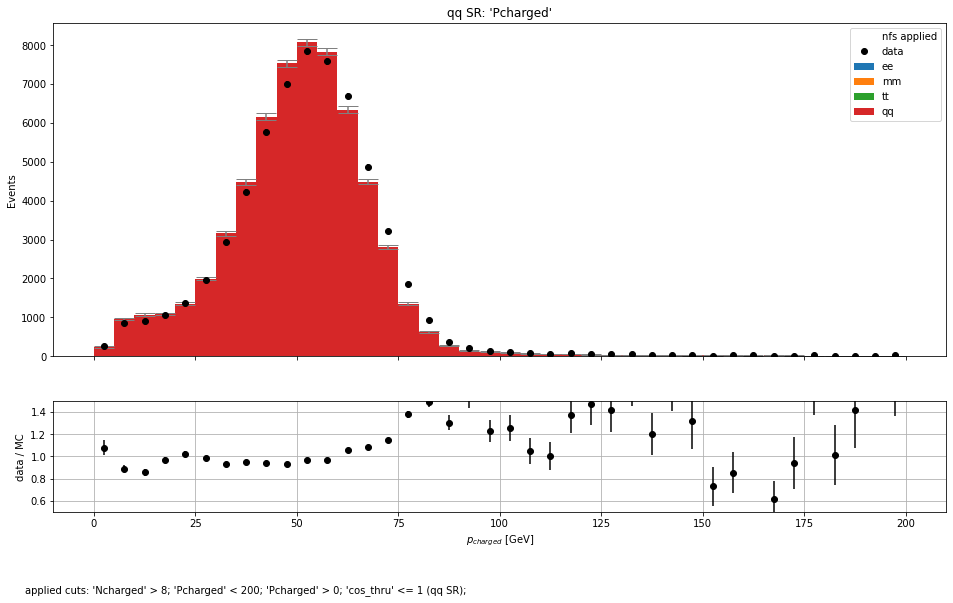

0 144.84598


<ipython-input-9-12fdd7790d53>:61: RuntimeWarning: divide by zero encountered in true_divide
  axs[1].plot(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:61: RuntimeWarning: invalid value encountered in true_divide
  axs[1].plot(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:63: RuntimeWarning: divide by zero encountered in true_divide
  axs[1].errorbar(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:63: RuntimeWarning: invalid value encountered in true_divide
  axs[1].errorbar(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:64: RuntimeWarning: divide by zero encountered in true_divide
  yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")
<ipython-input-9-12fdd7790d53>:64: RuntimeWarning: invalid value encountered in true_divide
  yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")
/projects/65341ef6-5538-4446-9178-dcfd0df75e06/.sage/local/lib/python3.8/site-packages/ma

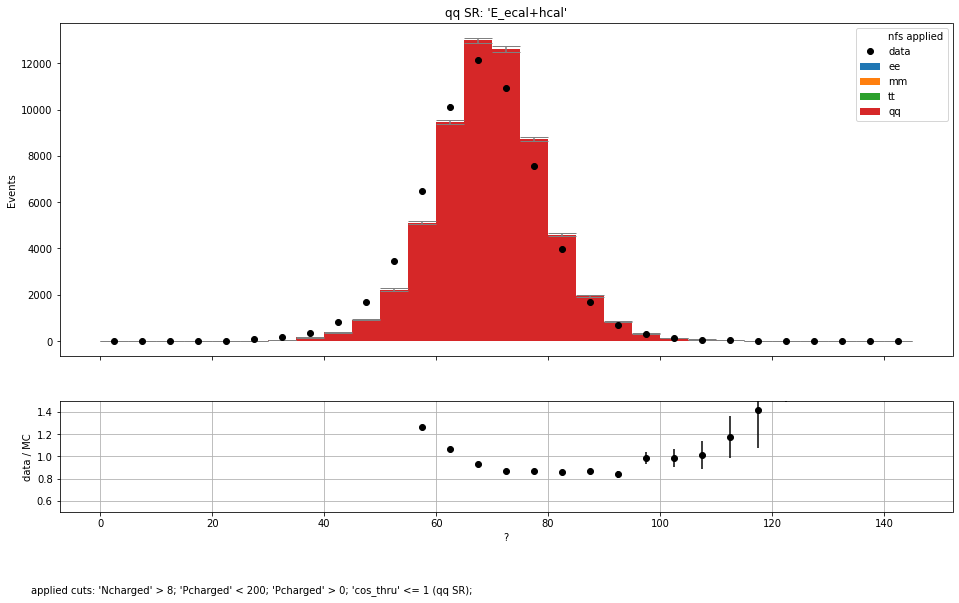

0 107.534386


<ipython-input-9-12fdd7790d53>:61: RuntimeWarning: invalid value encountered in true_divide
  axs[1].plot(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:63: RuntimeWarning: invalid value encountered in true_divide
  axs[1].errorbar(data_x, data_bin_content/mc_bin_content,
<ipython-input-9-12fdd7790d53>:64: RuntimeWarning: invalid value encountered in true_divide
  yerr=data_error_sizes/mc_bin_content, fmt='none', ecolor="k")


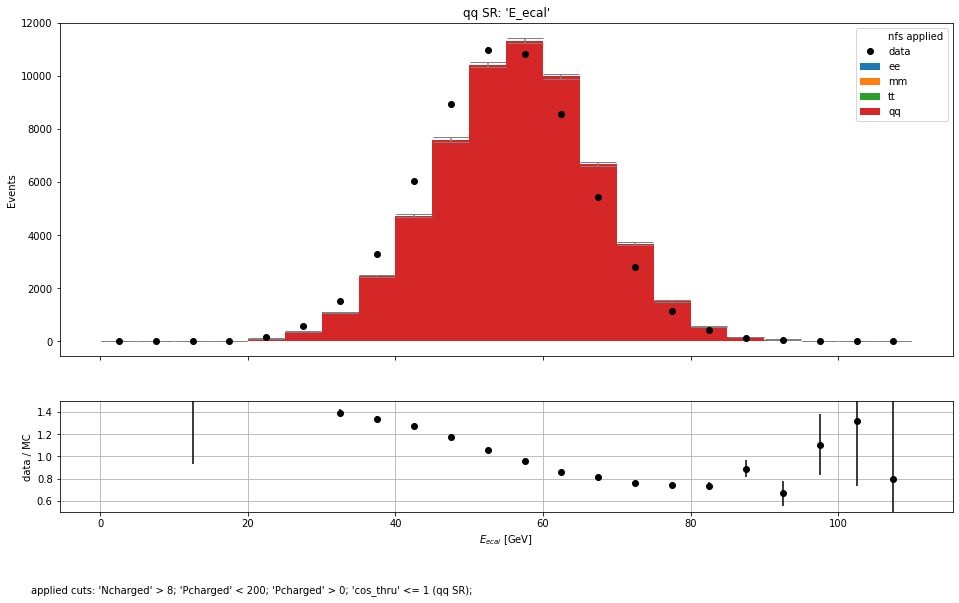

0.0 95.673386


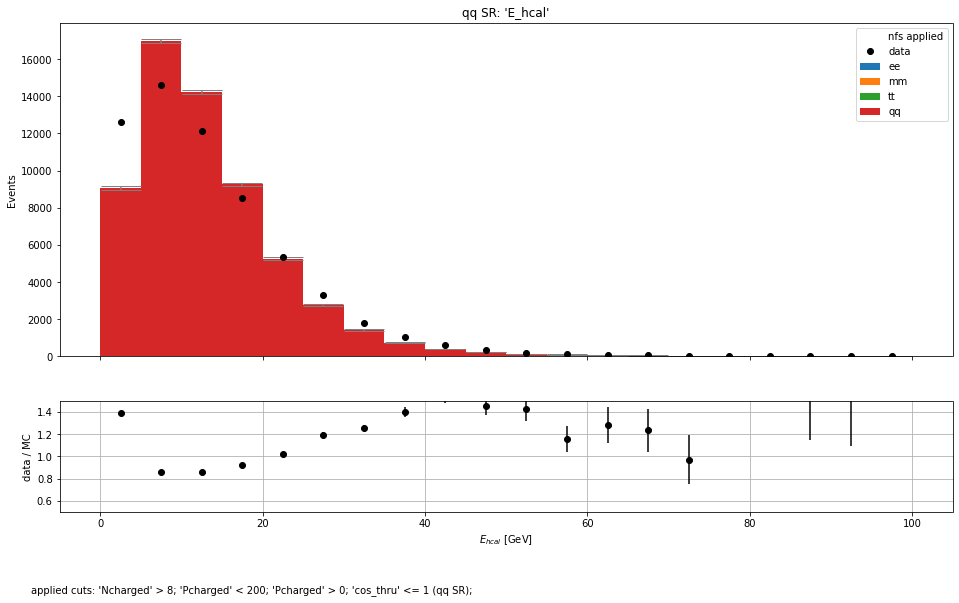

-0.9999853 0.9999364


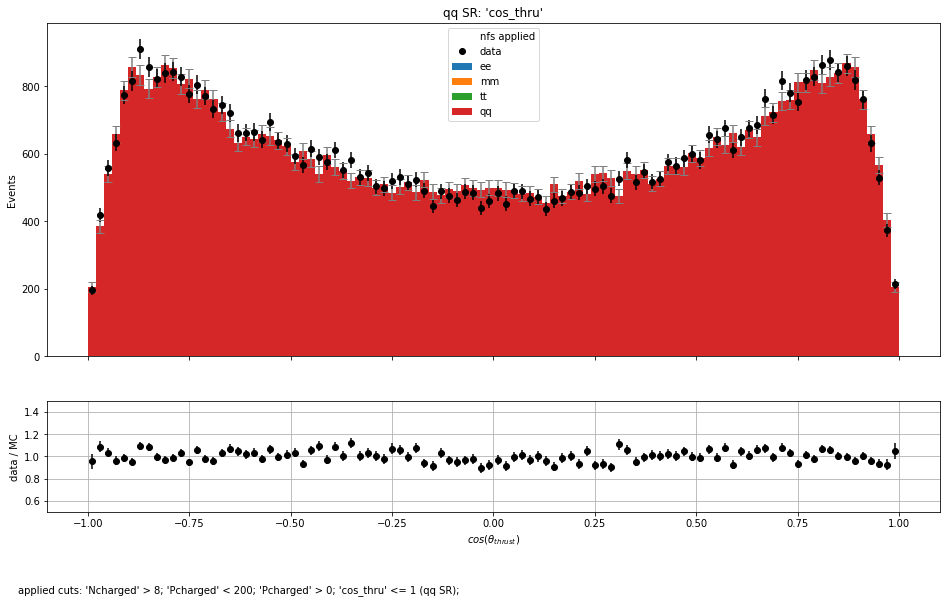

In [15]:
print("qq")
plot_cut_hists(qq_cut_params, ["int"])

plot_hist_with_cuts(qq_cut_params, [["Pcharged", 5],["E_ecal+hcal", 5],["E_ecal", 5],["E_hcal", 5], ["cos_thru", .02]])

Think about the statistical uncertainties computed above in 'error_sizes'. 
* **Are these sensible? Why do we use this formula?** (Hint: Making an histogram is, in short, a *counting experiment*. In the limit of large total number of events, the (binomial) probability function limits to the *Poisson distribution*. What is the variance? And the standard deviation?)

### Matrix Inversion
To determine the uncertainties of the matrix elements after the inversion we use Monte Carlo toy experiments. In this context, what are the advantages and disadvantages of this method when compared to analytical expressions? Discuss it briefly.

**References**:
* Propagation of Errors for Matrix Inversion: https://arxiv.org/abs/hep-ex/9909031v1

# Exercise 2: Separate $t$- and $s$-channel contributions

Only Feynman diagrams contributing to the production of $Z$ boson are to be considered for the measurements. The **electron** Monte Carlo sample incorporate contributions from $t$- and $s$-channels.
* Select/correct contributions producing $Z$ boson decays. (Hint: Which role does the $\cos(\theta)$ distribution play in separating $t$- and $s$-channels?)

[['Ncharged', '=', 2], ['E_ecal', '>=', 80], ['Pcharged', '<', 200], ['Pcharged', '>', 0], ['cos_thru', '<=', 1], ['cos_thet', '<=', 1, 'ee SR']]


-0.96378934 0.9932407


30.71229174860615 2.955115189949966 1.0500294768072638 0.41288733750174206


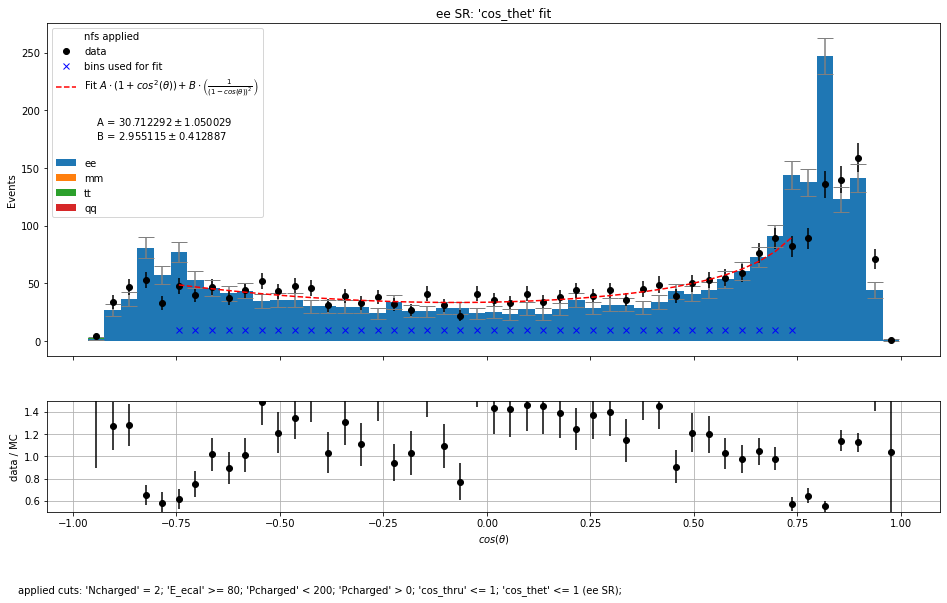

[[30.71229174860615, 2.955115189949966, 1.0500294768072638, 0.41288733750174206]]
30.71229174860615 2.955115189949966


In [16]:
from scipy.optimize import curve_fit


fit_results = []

def create_fit(ax, data_x, data_bin_content, data_error_sizes):
    
    mask = np.array(data_x > -.76) & np.array(data_x < .76) \
#     & (np.array(x < .78) | np.array(x > .81)) \
#     & (np.array(x > -.78) | np.array(x < -.81))


    data_x = data_x[mask]
    data_bin_content = data_bin_content[mask]
    data_error_sizes = data_error_sizes[mask]

    ax.plot(data_x, data_x*0+10, 'bx', label="bins used for fit")


    # Define model function to be used to fit to the data above:
    def fit(x, A, B):
        return A*(1+ x**2)+B*(1-x)**(-2) #+ C


    # p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
    p0 = [100,0]

    # ## Fit curve (WARNING: The fit does not propagate bin uncertainties to the uncertainties of the fit parameters!)
    coeff, var_matrix = curve_fit(fit, data_x, data_bin_content, p0=p0, sigma=data_error_sizes)
    coeff_err = np.sqrt(np.diag(var_matrix))


#     ax.plot(data_x, fit(data_x, *p0), "g--",label='Guess')

    ax.plot(data_x, fit(data_x, *coeff), "r--", label= \
             r"Fit $A \cdot(1 + cos^2(\theta))+ B \cdot \left(\frac{1}{(1 - cos(\theta))^2}\right)$")

    ax.plot([],[], 'none', label=r"""
    A = ${0:f} \pm {2:f}$
    B = ${1:f} \pm {3:f}$
    """.format(*coeff, *coeff_err))
    #---------------

    print(*coeff,*coeff_err)
    fit_results.append([*coeff, *coeff_err])

plot_hist_with_cuts(ee_cut_params, [["cos_thet", .04]], title_mod=" fit", fnc=create_fit)
print(fit_results)
a, b, a_err, b_err = fit_results[0]
print(a,b)

In [17]:
matrix = []
matrix_err = []
purity_list = []
purity_err_list = []


for j,sr_cuts in enumerate([ee_cut_params, mm_cut_params, tt_cut_params, qq_cut_params]):
    
    print(sr_cuts)
#     create_curflow(sr_cuts, files)
#     print()
    
    cut_mask = calculate_cuts(sr_cuts, files)
    
    events_SR = sum(sum(c) for c in cut_mask)
    events_SR_channels = [sum(c) for c in cut_mask]
    purity_list.append(events_SR_channels[j]/events_SR)
    purity_err_list.append(np.sqrt(events_SR_channels[j])/events_SR \
                           + events_SR_channels[j]/events_SR**2 * np.sqrt(events_SR))
    
    eff_list = []
    eff_err_list = []
    for i in range(4):
#         print(sum(cut_mask[i]))
        eff = sum(cut_mask[i]) / 10**5
        eff_err = np.sqrt(sum(cut_mask[i])) / 10**5
        
        if eff_err < 1/10**5:
            eff_err = 1/10**5
            
        if i==0:
#             a,b,a_err,b_err = coeff[0], coeff[1], coeff_err[0], coeff_err[1] 
            eff = eff / (a/(a+b))
            A_B_err = np.sqrt((a_err * (b) / a**2)**2 + (b_err / a)**2) 
            eff_err = np.sqrt((eff_err / (a/(a+b)))**2 + (eff * A_B_err)**2)
        
        eff_list.append(eff)
        eff_err_list.append(eff_err)
    matrix.append(eff_list)
    matrix_err.append(eff_err_list)

matrix = np.array(matrix)
matrix_err = np.array(matrix_err)
for i in range(4):
    fstr = ["({"+str(i)+":f} +- {"+str(i+4)+":f}) " for i in range(4)]
    fstr = "".join(fstr)

    print(fstr.format(*matrix[i], *matrix_err[i]))

print(matrix)
print(matrix_err)

[['Ncharged', '=', 2], ['E_ecal', '>=', 80], ['Pcharged', '<', 200], ['Pcharged', '>', 0], ['cos_thru', '<=', 1], ['cos_thet', '<=', 1, 'ee SR']]


[['Ncharged', '=', 2], ['E_ecal', '<=', 40], ['Pcharged', '<', 200], ['Pcharged', '>', 72], ['cos_thru', '<=', 1], ['cos_thet', '<=', 1, 'mm SR']]


[['Ncharged', '>=', 2], ['Ncharged', '<=', 6], ['E_ecal', '<=', 70], ['Pcharged', '<', 200], ['Pcharged', '<', 60], ['cos_thru', '<=', 1], ['cos_thru', '<', 0.92], ['cos_thru', '>', -0.92], ['Pcharged', '>', 0, 'tt SR']]


[['Ncharged', '>', 8], ['Pcharged', '<', 200], ['Pcharged', '>', 0], ['cos_thru', '<=', 1, 'qq SR']]


(0.194261 +- 0.003059) (0.000010 +- 0.000010) (0.000550 +- 0.000074) (0.000000 +- 0.000010) 
(0.000000 +- 0.000011) (0.760150 +- 0.002757) (0.002810 +- 0.000168) (0.000000 +- 0.000010) 
(0.001162 +- 0.000114) (0.009370 +- 0.000306) (0.685510 +- 0.002618) (0.001400 +- 0.000118) 
(0.000011 +- 0.000011) (0.000000 +- 0.000010) (0.002410 +- 0.000155) (0.962140 +- 0.003102) 
[[1.94261022e-01 1.00000000e-05 5.50000000e-04 0.00000000e+00]
 [0.00000000e+00 7.60150000e-01 2.81000000e-03 0.00000000e+00]
 [1.16199246e-03 9.37000000e-03 6.85510000e-01 1.40000000e-03]
 [1.09621930e-05 0.00000000e+00 2.41000000e-03 9.62140000e-01]]
[[3.05913692e-03 1.00000000e-05 7.41619849e-05 1.00000000e-05]
 [1.09621930e-05 2.75708179e-03 1.67630546e-04 1.00000000e-05]
 [1.14002758e-04 3.06104557e-04 2.61822459e-03 1.18321596e-04]
 [1.09632429e-05 1.00000000e-05 1.55241747e-04 3.10183816e-03]]


[[ 5.14773776e+00 -1.68103213e-05 -4.13009732e-03  6.00966206e-06]
 [ 3.22575333e-05  1.31559630e+00 -5.39286410e-03  7.84710098e-06]
 [-8.72617933e-03 -1.79824961e-02  1.45885610e+00 -2.12276648e-03]
 [-3.67934008e-05  4.50433408e-05 -3.65414381e-03  1.03935510e+00]]


Erros for the inverse matrix:
[[8.00700907e-02 6.68921919e-05 5.92834893e-04 5.37710389e-05]
 [7.71212681e-05 4.81047618e-03 3.38294527e-04 1.35894958e-05]
 [8.79632059e-04 6.93272372e-04 5.39258960e-03 1.83940538e-04]
 [5.67529748e-05 1.44361121e-05 2.48942606e-04 3.41055357e-03]]


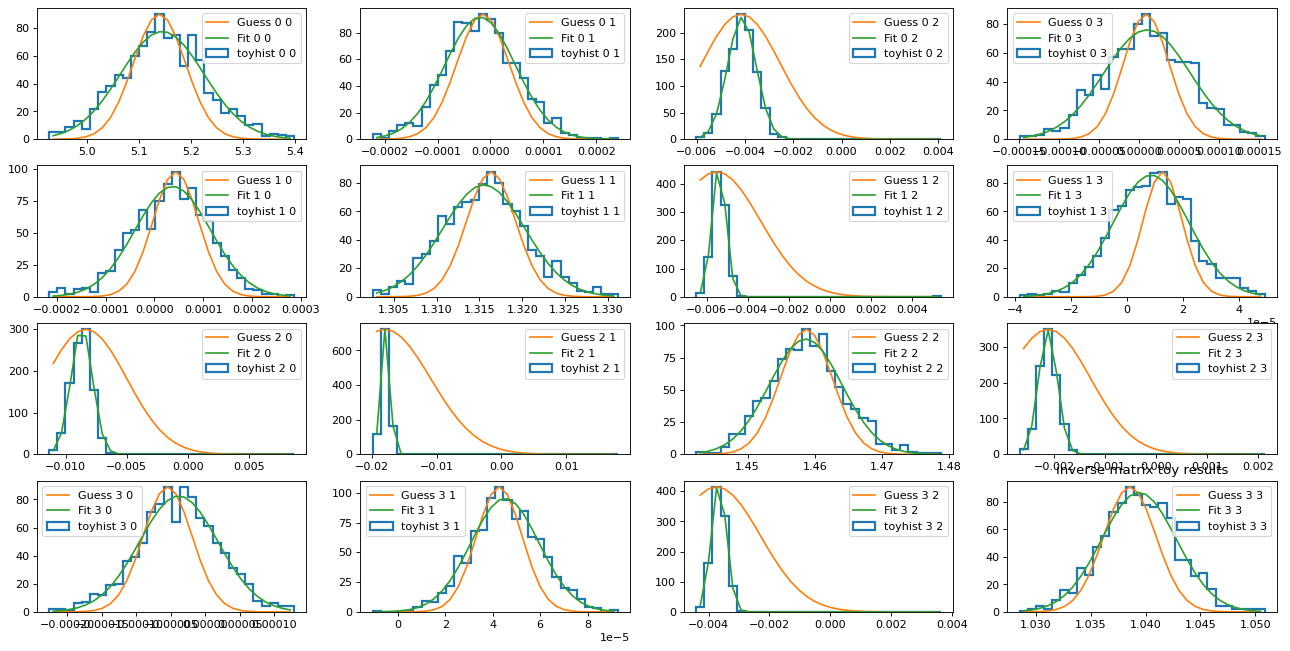

In [18]:
matrix = matrix
error_matrix = matrix_err

inv = np.linalg.inv(matrix)
print(inv)

### Number of toy experiments to be done
ntoy = 1000

### Create numpy matrix of list to append elements of inverted toy matrices
inverse_toys = np.empty((4,4))

# Create toy efficiency matrix out of gaussian-distributed random values
for i in range(0,ntoy,1):
    toy_matrix = np.zeros((4,4))
    toy_matrix = np.random.normal(matrix,error_matrix,size=(4,4))
    
    ### Invert toy matrix
    inverse_toy = np.linalg.inv(toy_matrix)
    
    #print(inverse_toys.item(0,0),inverse_toy.item(0,0))
    # Append values
    inverse_toys = np.dstack((inverse_toys,inverse_toy))
    
# Define gaussian function to fit to the toy distributions:
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


inverse_errors = np.zeros((4,4))
inverse_means = np.zeros((4,4))


fig = plt.figure(figsize=(20, 10),dpi=80)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)


# axes = [[0]*4]*4

ax00 = plt.subplot(4,4,1)
ax01 = plt.subplot(4,4,2)
ax02 = plt.subplot(4,4,3)
ax03 = plt.subplot(4,4,4)

ax10 = plt.subplot(4,4,5)
ax11 = plt.subplot(4,4,6)
ax12 = plt.subplot(4,4,7)
ax13 = plt.subplot(4,4,8)

ax20 = plt.subplot(4,4,9)
ax21 = plt.subplot(4,4,10)
ax22 = plt.subplot(4,4,11)
ax23 = plt.subplot(4,4,12)

ax30 = plt.subplot(4,4,13)
ax31 = plt.subplot(4,4,14)
ax32 = plt.subplot(4,4,15)
ax33 = plt.subplot(4,4,16)

axes = [[ax00,ax01,ax02,ax03],
        [ax10,ax11,ax12,ax13],
        [ax20,ax21,ax22,ax23],
        [ax30,ax31,ax32,ax33]]


## IMPORTANT! Find suitable ranges to fit/plot gaussian distributions successfully!
ranges = [[(0.0,1)   ,(-0.02,0.02), (-0.02,0.02), (-0.02,0.02)],
          [(-0.02,0.02),(0,1) , (-0.02,0.02), (-0.02,0.02)],
          [(-0.02,0.02),(-0.02,0.02), (0,1)   , (-0.02,0.02)],
          [(-0.02,0.02),(-0.02,0.02), (-0.02,0.02), (0.85,1.05)]]


# Fill histograms for each inverted matrix coefficient:
for j in range(0,4,1):
    for k in range(0,4,1):
        
        # Diagonal and off-diagonal terms have different histogram ranges
        hbins, hedges, _ = axes[j][k].hist(inverse_toys[j,k,:],bins=30,#range=ranges[j][k],
                                           histtype='step', linewidth=2, label=f'toyhist {j} {k}')

        ## Guess initial parameters of the fit by taking random value from hist and std
        _p0 = [ntoy/10.,np.std(inverse_toys[j,k,:]),np.std(inverse_toys[j,k,:])]

        # Get the fitted curve
        h_mid = 0.5*(hedges[1:] + hedges[:-1]) #Calculate midpoints for the fit
        
        max_val,max_index, fwhm = 0,0,0
        for i,v in enumerate(hbins):
            if v > max_val:
                max_val = v
                max_index = i
        for i in range(max_index, len(hbins)):
            if hbins[i] < max_val/2:
                fwhm = 2 * (h_mid[i] - h_mid[max_index])
            
        mu_guess = h_mid[max_index]
        guess = [max_val,mu_guess, fwhm*.1]
        axes[j][k].plot(h_mid, gauss(h_mid, *guess),label=f'Guess {j} {k}')

        try:
            coeffs, _ = curve_fit(gauss, h_mid, hbins, p0=guess, maxfev=10000)

            axes[j][k].plot(h_mid, gauss(h_mid, *coeffs),label=f'Fit {j} {k}')

            inverse_means[j,k] = coeffs[1]
            inverse_errors[j,k] = abs(coeffs[2])
        except Exception as e:
            print(j,k, e)
        
        axes[j][k].legend()

print(f"Erros for the inverse matrix:\n{inverse_errors}")

title = "inverse matrix toy results"
plt.title(title)
# plt.xlabel(r"$P_{charged} [GeV]$")
# plt.ylabel(r"$cos(\theta)$")

plt.savefig("plots/{}.png".format(title))
plt.show()

In [19]:
x = []
lumi = [[],[],[],[],[]]

with open(lumi_file) as csv_file:
    
    csv_reader = csv.reader(csv_file, delimiter=',')
    
    line_count = 0
    column_count = 0
    
    for row in csv_reader:
            if line_count > 0:
                x.append(row)
                line_count += 1
            else:
                line_count += 1
    
    
    for column_count in range(5):
        
        lumi[column_count] = []
        
        for row_2 in x:
            
            if line_count > 0:
                lumi[column_count].append(float(row_2[column_count]))
                line_count += 1
            else:
                line_count += 1
        

print(x)
print(lumi)

[['88.47777', '371.9800', '2.594937', '2.488100', '3.595044    '], ['89.46906', '488.5300', '3.009684', '3.273000', '4.446429    '], ['90.22324', '378.5461', '2.670417', '2.533900', '3.681273    '], ['91.23965', '2072.793', '6.334670', '13.87960', '15.25684    '], ['91.96968', '540.6800', '3.274401', '3.620000', '4.881198    '], ['92.97059', '369.4000', '2.737608', '2.480000', '3.693900    '], ['93.71714', '353.5000', '2.695570', '2.371000', '3.589950    ']]
[[88.47777, 89.46906, 90.22324, 91.23965, 91.96968, 92.97059, 93.71714], [371.98, 488.53, 378.5461, 2072.793, 540.68, 369.4, 353.5], [2.594937, 3.009684, 2.670417, 6.33467, 3.274401, 2.737608, 2.69557], [2.4881, 3.273, 2.5339, 13.8796, 3.62, 2.48, 2.371], [3.595044, 4.446429, 3.681273, 15.25684, 4.881198, 3.6939, 3.58995]]


In [20]:
x_sec_list = []
x_sec_err_tot_list = []
x_sec_err_par_list = []

xs_corrections = { 'energy' : [ 88.47, 89.46, 90.22, 91.22, 91.97, 92.96, 93.76] ,
                      'hadronic' : [2.0, 4.3, 7.7, 10.8, 4.7, -0.2, -1.6],
                      'leptonic' : [0.09, 0.20, 0.36, 0.52, 0.22, -0.01, -0.08]}


for j in range(7):
    s_energy = lumi[0][j]


    vec = []
    for i,sr_cuts in enumerate([ee_cut_params, mm_cut_params, tt_cut_params, qq_cut_params]):
#         create_curflow(sr_cuts, files)

        sr_cuts =[*sr_cuts,*energy_cut_params[j]]
        
        cut_mask = calculate_cuts(sr_cuts, [data_file])
        
        events_SR = sum(sum(c) for c in cut_mask)
        vec.append(events_SR)
    vec = np.array(vec)    
    result = np.array(np.dot(inv,vec))
#     print(result, 1/lumi[1][j])
    
    x_sec = result / lumi[1][j]
    for i in range(3):
        x_sec[i] += xs_corrections['leptonic'][j]
    x_sec[3] += xs_corrections['hadronic'][j]    
    mc_stat_err = np.array([np.dot(inverse_errors[x],result) /lumi[1][j] for x in range(4)])
#     print(mc_stat_err)
    data_stat_err = np.array([np.dot(inv[x],np.sqrt(vec)) /lumi[1][j] for x in range(4)])
#     print(data_stat_err)
    lumi_stat_err = result / lumi[1][j]**2 * lumi[2][j]
    lumi_sys_err = result / lumi[1][j]**2 * lumi[3][j]
    x_sec_err_tot = np.sqrt(mc_stat_err**2 + data_stat_err**2 + lumi_stat_err**2 + lumi_sys_err**2)
#     print(x_sec_err_tot)
    x_sec_list.append([*x_sec])
    x_sec_err_tot_list.append([*x_sec_err_tot])
    x_sec_err_par_list_temp = []
    for y in range(4):
        x_sec_err_par_list_temp.append([mc_stat_err[y],data_stat_err[y],\
                                        lumi_stat_err[y],lumi_sys_err[y]])
    x_sec_err_par_list.append(x_sec_err_par_list_temp)
    #print("xSec of {}GeV: {}".format(s_energy, x_sec))
print(x_sec_list)
print(x_sec_err_tot_list)
print(x_sec_err_par_list)

[[3.6179663875418626, 0.3151830418190868, 0.4029436425130676, 7.551055115059212], [4.371169083040701, 0.6773435395555583, 0.7358326238755237, 14.536162050838136], [6.000942493492094, 1.2290814023754943, 1.2251254776199496, 26.45320794323836], [6.597782436651162, 1.9552660175047483, 1.9873480077999306, 41.29742349063791], [4.891269740870421, 1.5148600716985459, 1.4147701209839019, 29.369689266931918], [2.7749748572476336, 0.6318995460536596, 0.7173371928168257, 14.111011448903836], [2.437887088683753, 0.4355375269657575, 0.3914941364315664, 8.507091721691987]]
[[0.36060025347475744, 0.028288306679258406, 0.03577335009481509, 0.13688434069197494], [0.39687521343109955, 0.03616095401398923, 0.04135871109316271, 0.1779753252898951], [0.5339433687886446, 0.05573041129154726, 0.0601993441843635, 0.2980745320944478], [0.5064116636398049, 0.03297554060265181, 0.03939225835448975, 0.2768302402449057], [0.4332498741914064, 0.05768873203537958, 0.06016147477202946, 0.322714303233245], [0.29972573

# Exercise 3: Measurement of the total production cross sections

For **each** of the seven centre-of-mass energies:
* Determine the number of events in the handronic channel *and* in the three leptonic channels
* Substract the background and correct for selection efficiencies accordingly
* Then, calculate the differnetial cross sections for the hadronic *and* the leptnic channels
* Add the radiation corrections from The table given below. **Don't forget to take the uncertainties (errors) into account!**

| $\sqrt{s}$   \[GeV\]| Correction hadronic channel    \[nb\] |  Correction leptonic channel   \[nb\]|
| --- | --- | --- |
| 88.47 | +2.0  | +0.09 |
| 89.46 | +4.3  | +0.20 |
| 90.22 | +7.7  | +0.36 |
| 91.22 | +10.8 | +0.52 |
| 91.97 | +4.7  | +0.22 |
| 92.96 | -0.2  | -0.01 |
| 93.76 | -1.6  | -0.08 |

Feel free to access these values using the dictionary 'xs_corrections' given below.
* Once the total cross section for all four decay channels at all seven energies have been measured, fit a **Breit-Wigner distribution** to measure the $Z$ boson mass ($m_Z$) and the resonance width ($\Gamma_Z$) and the peak cross section s of the resonance for the hadronic and the leptonic channels. Again, **propagate the uncertainties carefully**.
* Compare your results to the OPAL cross section s and the theoretical predictions. How many degrees of freedom does the fit have? How can you udge if the model is compatible with the measured data? Calculate the  **confidence levels**.
* Calculate the partial widths for all channels from the measured cross sections on the peak. Which is the best partial width to start with? Compare them with the theoretical predictions and the values that you have calculated in the beginning.
* Determine from your results the **number of generations of light neutrinos**. Which assumptions are necessary?
* Discuss in detail the systematic uncertainties in the whole procedure of the analysis. Which assumptions were necessary?

These are some **references** that might be interesting to look up:
* Particle Data Book: https://pdg.lbl.gov/2020/download/Prog.Theor.Exp.Phys.2020.083C01.pdf
** Resonances: https://pdg.lbl.gov/2017/reviews/rpp2017-rev-resonances.pdf
* Precision Electroweak Measurements on the Z Resonance (Combination LEP): https://arxiv.org/abs/hep-ex/0509008
* Measurement of the $Z^0$ mass and width with the OPAL detector at LEP: https://doi.org/10.1016/0370-2693(89)90705-3
* Measurement of the $Z^0$ line shape parameters and the electroweak couplings of charged leptons: https://inspirehep.net/literature/315269
* The OPAL Collaboration, *Precise Determination of the $Z$ Resonance Parameters at LEP: "Zedometry"*: https://arxiv.org/abs/hep-ex/0012018
* Fitting a Breit-Wigner curve using uproot: https://masonproffitt.github.io/uproot-tutorial/07-fitting/index.html

# Exercise 3: Forward-backward asymmetry and $\sin^2(\theta_\text{W})$ in muon final states

* Using the **muon channel only**, measure the forward-backward asymmetry $\mathcal{A}_\text{FB}$ using OPAL data and muon Monte Carlo events. Take into account the radiation corrections given below. 

| $\sqrt{s}$   \[GeV\]| Radiation correction [-]|  
| --- | --- | 
| 88.47 | 0.021512  | 
| 89.46 | 0.019262  | 
| 90.22 | 0.016713  | 
| 91.22 | 0.018293  | 
| 91.97 | 0.030286  | 
| 92.96 | 0.062196  | 
| 93.76 | 0.093850  | 

Feel free to use the dictionary 'radiation_corrections' given below.

* Measure the **Weinberg angle** as $\sin^2(\theta_\text{W})$. Compare the measurement with the literature.

[27593, 27874] [[30, 59, 113, 792, 205, 43, 48], [22, 72, 70, 851, 191, 81, 50]]
[166.1114083980989, 166.95508378003947] [[5.477225575051661, 7.681145747868608, 10.63014581273465, 28.142494558940577, 14.317821063276353, 6.557438524302, 6.928203230275509], [4.69041575982343, 8.48528137423857, 8.366600265340756, 29.171904291629644, 13.820274961085254, 9.0, 7.0710678118654755]]


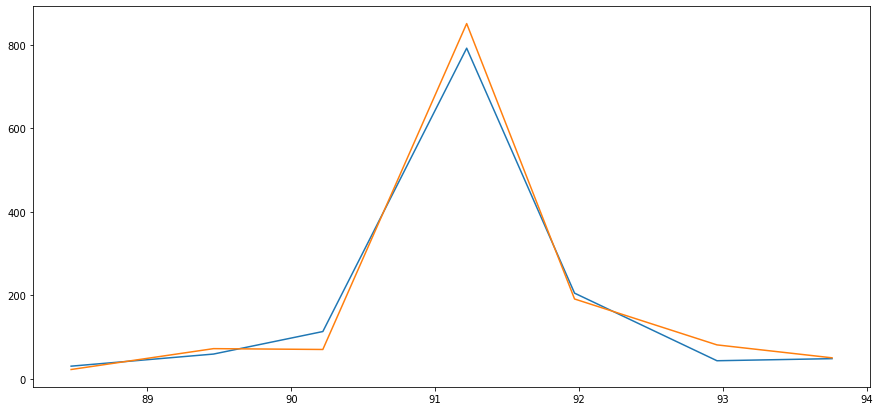

In [21]:
radiation_corrections = { 'energy' : [ 88.47, 89.46, 90.22, 91.22, 91.97, 92.96, 93.76] ,
                          'correction' : [0.021512, 0.019262, 0.016713, 0.018293, 0.030286, 0.062196, 0.093850]}
mc_data = []
data_data = [[],[]]
mc_data_err = []
data_data_err = [[],[]]

for l,direction in enumerate([[['cos_thet', ">=", -.7],['cos_thet', "<", 0]],\
                  [['cos_thet', ">", 0],['cos_thet', "<=", .7]]]):
    cut_mask_mc   = calculate_cuts(mm_cut_params + direction, files)
    mc_events = sum(sum(c) for c in cut_mask_mc)
    mc_data.append(mc_events)
    mc_data_err.append(np.sqrt(mc_events))
    for j in range(7):
        cut_mask_data = calculate_cuts(mm_cut_params + direction + energy_cut_params[j], [data_file]) 
        data_events = sum(sum(c) for c in cut_mask_data)
        data_data[l].append(data_events)
        data_data_err[l].append(np.sqrt(data_events))
    
print(mc_data,data_data)
print(mc_data_err,data_data_err)
plt.plot(radiation_corrections['energy'],data_data[0])
plt.plot(radiation_corrections['energy'],data_data[1])
plt.show()

# Exercise 4: Tests on lepton universality¶

* Test the lepton universality from the total cross sectinos on the peak for $Z\to e^+ e^-$, $Z\to \mu^+ \mu^-$ and $Z\to \tau^+ \tau^-$ events. What is the ratio of the total cross section of the hadronic channel to the leptonic channels on the peak? Compare with the ratios obtained from the branching rations and discuss possible differences.